In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import tensorflow as tf
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import date2num, DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading the CSV file with semicolon as the delimiter
data = pd.read_csv('DataCapstone.csv', delimiter=';')

# Display the first five and the last five rows with centered text styling
from IPython.display import display
# Selecting the first five rows
first_five = data.head()
# Selecting the last five rows
last_five = data.tail()

# Displaying using a single call to display() for aesthetics
display(pd.concat([first_five, last_five]).style.set_table_styles([
    {'selector': 'th, td', 'props': [('text-align', 'center')]},  # Centering text for both headers and data cells
    {'selector': 'th', 'props': [('font-size', '12pt'), ('background-color', 'gray'), ('color', 'white')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('margin', '0 auto'), ('width', '80%')]},
    {'selector': 'td, th', 'props': [('border', '1px solid black')]}
]))

## CHECK MISSING DATA

In [2]:
# Checking for missing data in the DataFrame
missing_data = data.isnull().sum()

# Displaying the number of missing entries in each column
print("Missing Data in Each Column:")
print(missing_data)

# Checking if there are any missing values in the DataFrame
has_missing_values = data.isnull().values.any()

# Displaying the result
print("\nAre there any missing values in the dataset? ", "Yes" if has_missing_values else "No")

# Showing the total count of missing values
total_missing = missing_data.sum()
print("Total missing values in the dataset: ", total_missing)

Missing Data in Each Column:
Date                     0
S&P 500 PRICE IN USD     0
GOLD PRICE IN USD        0
BITCOIN PRICE IN USD     0
ETHEREUM PRICE IN USD    0
dtype: int64

Are there any missing values in the dataset?  No
Total missing values in the dataset:  0


In [3]:
# Print the column names to understand the structure
print("Column names in the dataset:")
# Join column names with a comma and space for better readability on one line
print(", ".join(data.columns))

Column names in the dataset:
Date, S&P 500 PRICE IN USD, GOLD PRICE IN USD, BITCOIN PRICE IN USD, ETHEREUM PRICE IN USD


## VISUALIZATION OF HISTORICAL PRICES

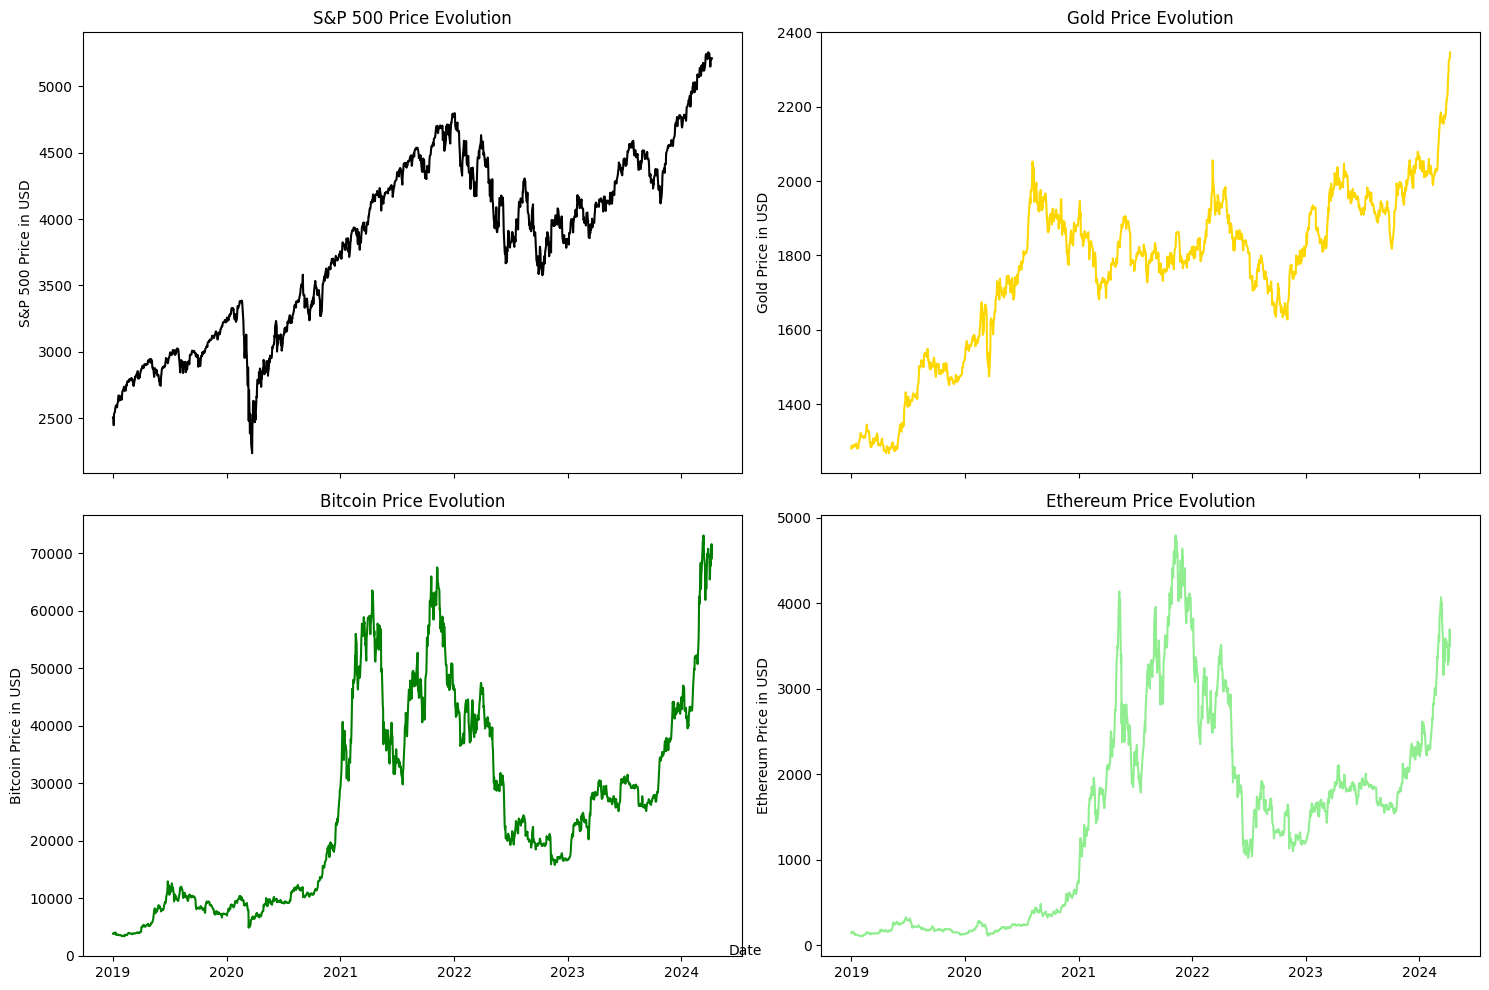

In [4]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Create subplots with a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Plot each graph in its respective subplot
axs[0, 0].plot(data['Date'], data['S&P 500 PRICE IN USD'], color='black')
axs[0, 0].set_title('S&P 500 Price Evolution')
axs[0, 0].set_ylabel('S&P 500 Price in USD')

axs[0, 1].plot(data['Date'], data['GOLD PRICE IN USD'], color='gold')
axs[0, 1].set_title('Gold Price Evolution')
axs[0, 1].set_ylabel('Gold Price in USD')

axs[1, 0].plot(data['Date'], data['BITCOIN PRICE IN USD'], color='green')
axs[1, 0].set_title('Bitcoin Price Evolution')
axs[1, 0].set_ylabel('Bitcoin Price in USD')

axs[1, 1].plot(data['Date'], data['ETHEREUM PRICE IN USD'], color='lightgreen')
axs[1, 1].set_title('Ethereum Price Evolution')
axs[1, 1].set_ylabel('Ethereum Price in USD')

# Set a common x-axis label
fig.text(0.5, 0.04, 'Date', ha='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

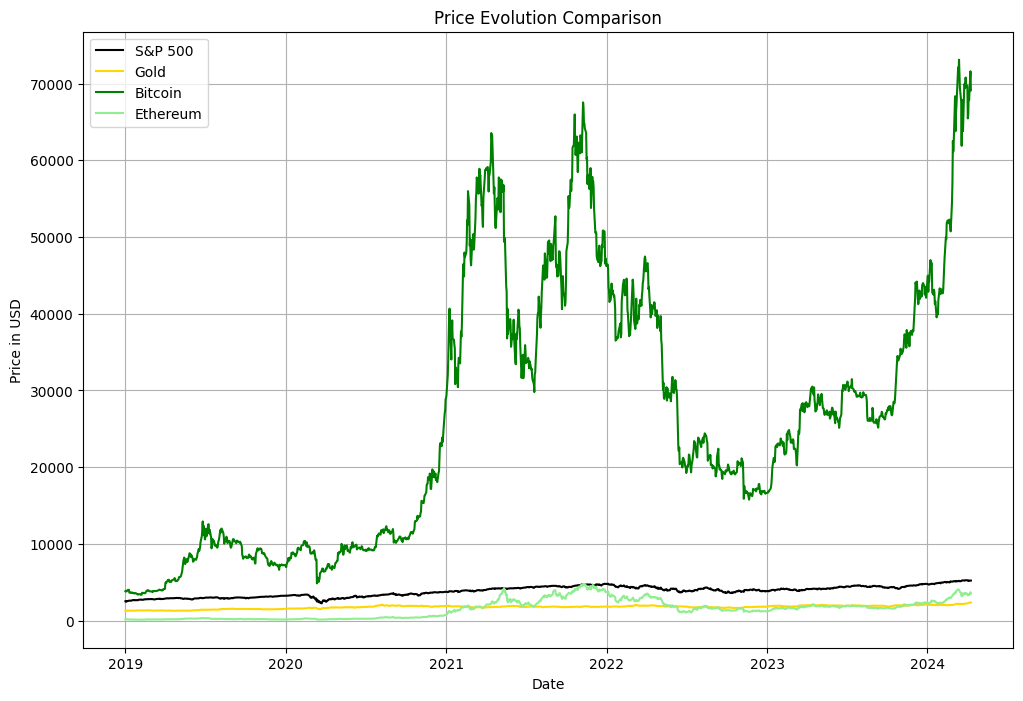

In [5]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Create a single plot
plt.figure(figsize=(12, 8))

# Plot each graph with different colors
plt.plot(data['Date'], data['S&P 500 PRICE IN USD'], color='black', label='S&P 500')
plt.plot(data['Date'], data['GOLD PRICE IN USD'], color='gold', label='Gold')
plt.plot(data['Date'], data['BITCOIN PRICE IN USD'], color='green', label='Bitcoin')
plt.plot(data['Date'], data['ETHEREUM PRICE IN USD'], color='lightgreen', label='Ethereum')

# Add titles and labels
plt.title('Price Evolution Comparison')
plt.xlabel('Date')
plt.ylabel('Price in USD')

# Add grid for better readability
plt.grid(True)

# Add a legend to distinguish the datasets
plt.legend()

# Show the plot
plt.show()

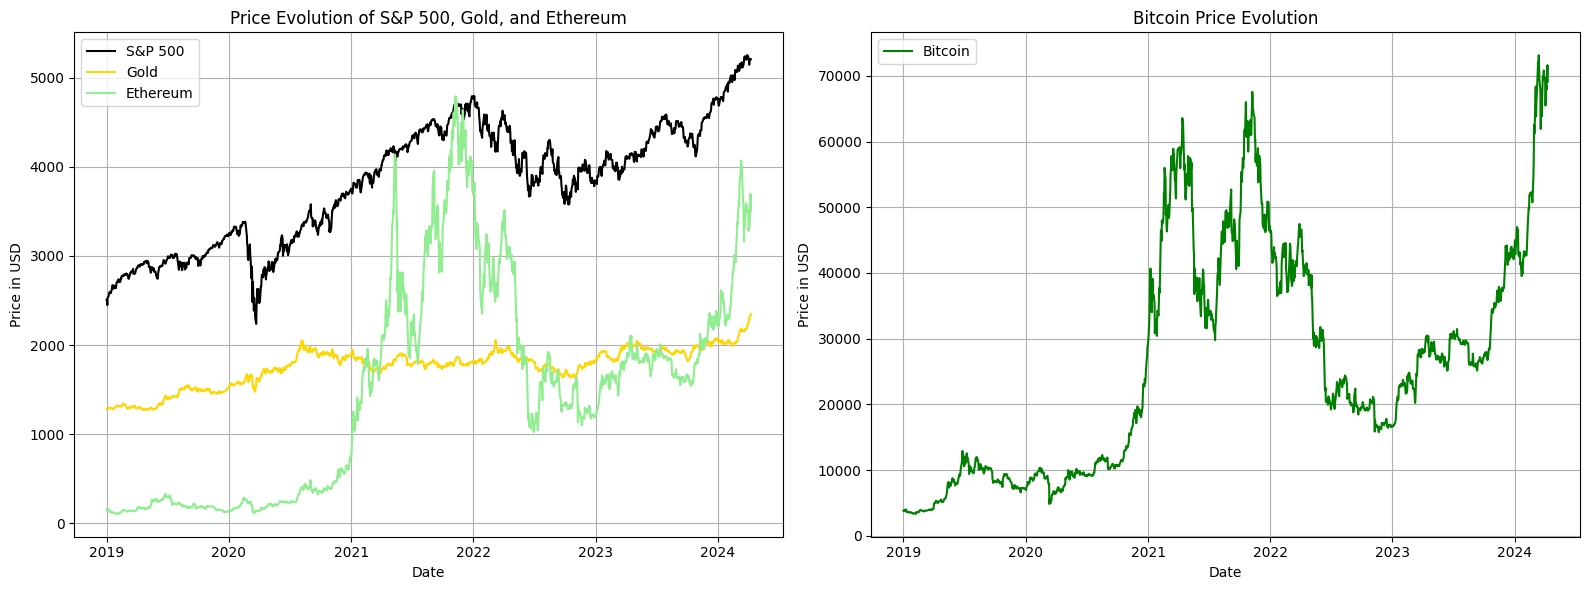

In [5]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Set up the subplot configuration with equal dimensions for both subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# Plot S&P 500, Gold, and Ethereum on the left subplot
ax_left = axs[0]
ax_left.plot(data['Date'], data['S&P 500 PRICE IN USD'], color='black', label='S&P 500')
ax_left.plot(data['Date'], data['GOLD PRICE IN USD'], color='gold', label='Gold')
ax_left.plot(data['Date'], data['ETHEREUM PRICE IN USD'], color='lightgreen', label='Ethereum')
ax_left.set_title('Price Evolution of S&P 500, Gold, and Ethereum')
ax_left.set_xlabel('Date')
ax_left.set_ylabel('Price in USD')
ax_left.grid(True)
ax_left.legend()

# Plot Bitcoin on the right subplot
ax_right = axs[1]
ax_right.plot(data['Date'], data['BITCOIN PRICE IN USD'], color='green', label='Bitcoin')
ax_right.set_title('Bitcoin Price Evolution')
ax_right.set_xlabel('Date')
ax_right.set_ylabel('Price in USD')
ax_right.grid(True)
ax_right.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()

## RE-SCALE BITCOIN PRICE TO VIEW ALL 4 ASSETS ON A SINGLE CHART

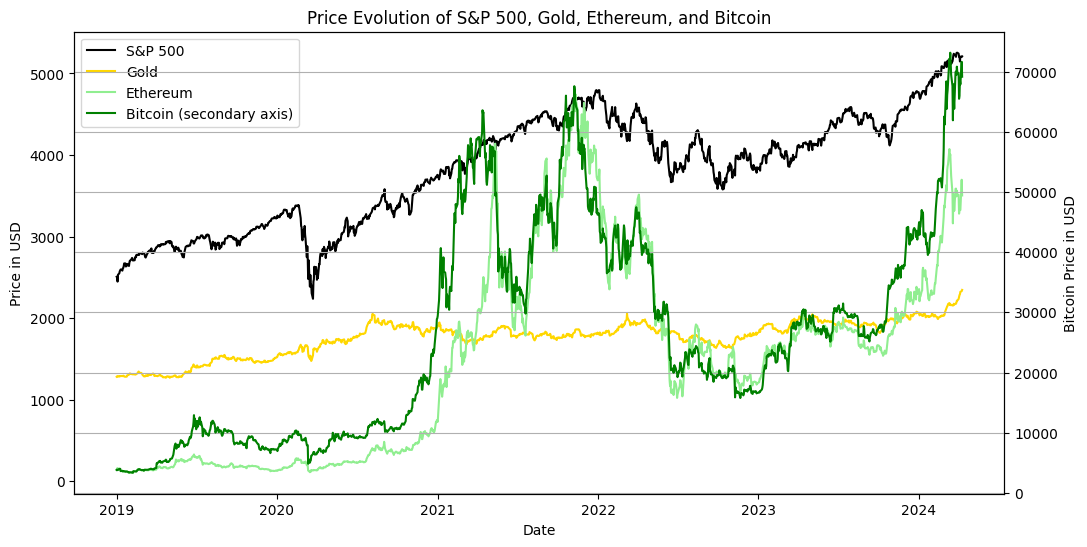

In [6]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Ethereum, S&P 500, and Gold on the primary y-axis
ax1.plot(data['Date'], data['S&P 500 PRICE IN USD'], color='black', label='S&P 500')
ax1.plot(data['Date'], data['GOLD PRICE IN USD'], color='gold', label='Gold')
ax1.plot(data['Date'], data['ETHEREUM PRICE IN USD'], color='lightgreen', label='Ethereum')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price in USD')
ax1.tick_params(axis='y')

# Create a secondary y-axis for Bitcoin
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['BITCOIN PRICE IN USD'], color='green', label='Bitcoin (secondary axis)')
ax2.set_ylabel('Bitcoin Price in USD')
ax2.tick_params(axis='y')

# Add a legend with all labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Title and grid
plt.title('Price Evolution of S&P 500, Gold, Ethereum, and Bitcoin')
plt.grid(True)

# Show the plot
plt.show()

# ASSETS CORRELATION

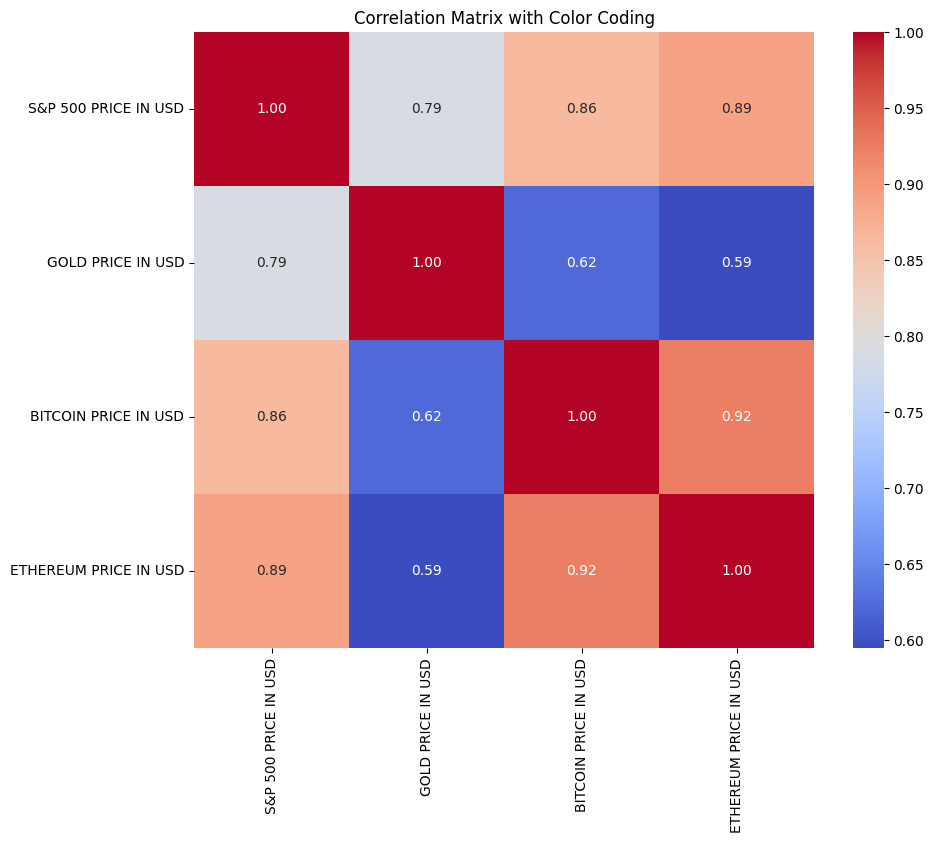

In [7]:
# Load the data specifying the column separator and the correct decimal separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix with color coding
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix with Color Coding')
plt.show()

In [8]:
# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=',')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Define specific asset pairs to evaluate
pairs = [
    ("S&P 500 PRICE IN USD", "BITCOIN PRICE IN USD"),
    ("S&P 500 PRICE IN USD", "ETHEREUM PRICE IN USD"),
    ("GOLD PRICE IN USD", "BITCOIN PRICE IN USD"),
    ("GOLD PRICE IN USD", "ETHEREUM PRICE IN USD"),
    ("BITCOIN PRICE IN USD", "ETHEREUM PRICE IN USD")
]

# Function to calculate, interpret, and print correlation tests for selected pairs
def interpret_selected_correlations(df, pairs):
    for (asset1, asset2) in pairs:
        if asset1 in df.columns and asset2 in df.columns:
            corr, p_value = pearsonr(df[asset1], df[asset2])
            # Interpreting the significance
            significance = "significant" if p_value < 0.05 else "not significant"
            # Interpreting the power
            if abs(corr) > 0.8:
                strength = "very strong"
            elif abs(corr) > 0.6:
                strength = "strong"
            elif abs(corr) > 0.4:
                strength = "moderate"
            else:
                strength = "weak"
            # Printing results
            print(f"Correlation between {asset1} and {asset2} is {strength} ({corr:.3f}), and is {significance} (p-value: {p_value:.4f}).")
        else:
            print(f"One of the assets, {asset1} or {asset2}, is not present in the data.")

# Perform and interpret the correlation tests for selected pairs
interpret_selected_correlations(data, pairs)

Correlation between S&P 500 PRICE IN USD and BITCOIN PRICE IN USD is very strong (0.861), and is significant (p-value: 0.0000).
Correlation between S&P 500 PRICE IN USD and ETHEREUM PRICE IN USD is very strong (0.889), and is significant (p-value: 0.0000).
Correlation between GOLD PRICE IN USD and BITCOIN PRICE IN USD is strong (0.622), and is significant (p-value: 0.0000).
Correlation between GOLD PRICE IN USD and ETHEREUM PRICE IN USD is moderate (0.595), and is significant (p-value: 0.0000).
Correlation between BITCOIN PRICE IN USD and ETHEREUM PRICE IN USD is very strong (0.923), and is significant (p-value: 0.0000).


# STUDY OF ASSET YIELDS

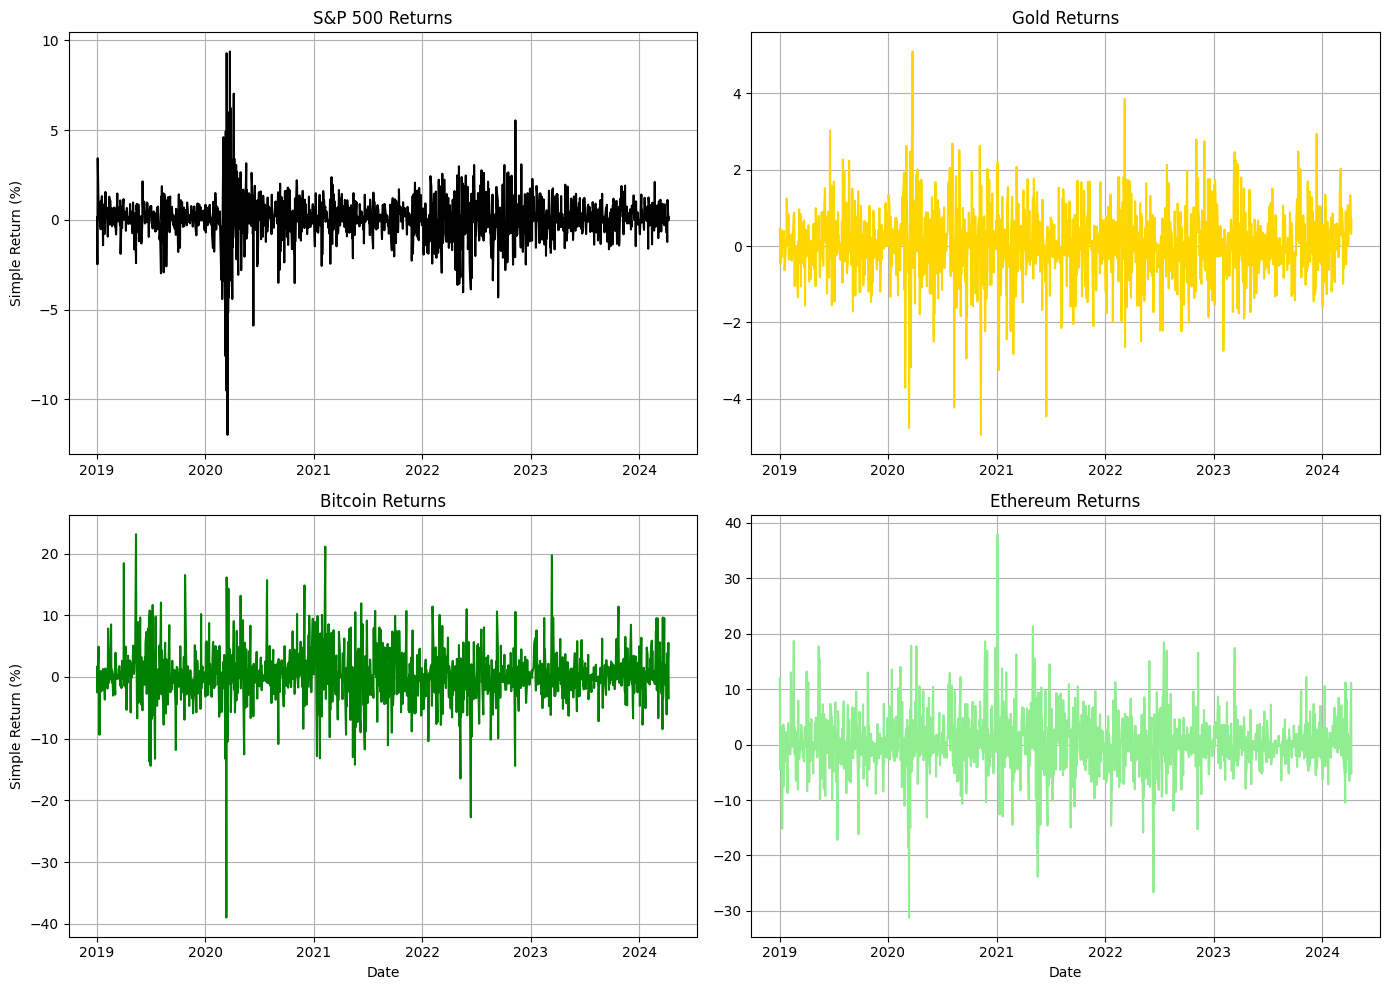

In [9]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Calculate simple returns as the percentage change between consecutive prices
data['S&P 500 RETURN'] = (data['S&P 500 PRICE IN USD'] / data['S&P 500 PRICE IN USD'].shift(1) - 1) * 100
data['GOLD RETURN'] = (data['GOLD PRICE IN USD'] / data['GOLD PRICE IN USD'].shift(1) - 1) * 100
data['BITCOIN RETURN'] = (data['BITCOIN PRICE IN USD'] / data['BITCOIN PRICE IN USD'].shift(1) - 1) * 100
data['ETHEREUM RETURN'] = (data['ETHEREUM PRICE IN USD'] / data['ETHEREUM PRICE IN USD'].shift(1) - 1) * 100

# Create four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot each asset's simple returns on a separate subplot
axes[0, 0].plot(data['Date'], data['S&P 500 RETURN'], color='black')
axes[0, 0].set_title('S&P 500 Returns')
axes[0, 0].set_ylabel('Simple Return (%)')
axes[0, 0].grid(True)

axes[0, 1].plot(data['Date'], data['GOLD RETURN'], color='gold')
axes[0, 1].set_title('Gold Returns')
axes[0, 1].grid(True)

axes[1, 0].plot(data['Date'], data['BITCOIN RETURN'], color='green')
axes[1, 0].set_title('Bitcoin Returns')
axes[1, 0].set_ylabel('Simple Return (%)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].grid(True)

axes[1, 1].plot(data['Date'], data['ETHEREUM RETURN'], color='lightgreen')
axes[1, 1].set_title('Ethereum Returns')
axes[1, 1].set_xlabel('Date')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Calculate simple returns as the percentage change of consecutive prices
data['S&P 500 RETURN'] = (data['S&P 500 PRICE IN USD'] / data['S&P 500 PRICE IN USD'].shift(1) - 1) * 100
data['GOLD RETURN'] = (data['GOLD PRICE IN USD'] / data['GOLD PRICE IN USD'].shift(1) - 1) * 100
data['BITCOIN RETURN'] = (data['BITCOIN PRICE IN USD'] / data['BITCOIN PRICE IN USD'].shift(1) - 1) * 100
data['ETHEREUM RETURN'] = (data['ETHEREUM PRICE IN USD'] / data['ETHEREUM PRICE IN USD'].shift(1) - 1) * 100

# Drop the rows where at least one element is missing
data.dropna(inplace=True)

# Calculate the correlations and p-values for simple returns
correlation_sp500_bitcoin, p_value_sp500_bitcoin = pearsonr(data['S&P 500 RETURN'], data['BITCOIN RETURN'])
correlation_sp500_ethereum, p_value_sp500_ethereum = pearsonr(data['S&P 500 RETURN'], data['ETHEREUM RETURN'])
correlation_gold_bitcoin, p_value_gold_bitcoin = pearsonr(data['GOLD RETURN'], data['BITCOIN RETURN'])
correlation_gold_ethereum, p_value_gold_ethereum = pearsonr(data['GOLD RETURN'], data['ETHEREUM RETURN'])
correlation_bitcoin_ethereum, p_value_bitcoin_ethereum = pearsonr(data['BITCOIN RETURN'], data['ETHEREUM RETURN'])

# Function to print correlations, p-values, and significance in a more formatted manner
significance_level = 0.05  # Common choice for statistical significance
def print_significance(correlation, p_value, assets):
    signif_status = "statistically significant" if p_value < significance_level else "not statistically significant"
    print(f"Correlation between {assets} returns: {correlation:.4f}, p-value: {p_value:.4g}")
    print(f"The correlation between {assets} is {signif_status}.")

print_significance(correlation_sp500_bitcoin, p_value_sp500_bitcoin, "S&P 500 and Bitcoin")
print_significance(correlation_sp500_ethereum, p_value_sp500_ethereum, "S&P 500 and Ethereum")
print_significance(correlation_gold_bitcoin, p_value_gold_bitcoin, "Gold and Bitcoin")
print_significance(correlation_gold_ethereum, p_value_gold_ethereum, "Gold and Ethereum")
print_significance(correlation_bitcoin_ethereum, p_value_bitcoin_ethereum, "Bitcoin and Ethereum")

Correlation between S&P 500 and Bitcoin returns: 0.3063, p-value: 2.968e-31
The correlation between S&P 500 and Bitcoin is statistically significant.
Correlation between S&P 500 and Ethereum returns: 0.2999, p-value: 5.807e-30
The correlation between S&P 500 and Ethereum is statistically significant.
Correlation between Gold and Bitcoin returns: 0.1374, p-value: 3.158e-07
The correlation between Gold and Bitcoin is statistically significant.
Correlation between Gold and Ethereum returns: 0.1291, p-value: 1.552e-06
The correlation between Gold and Ethereum is statistically significant.
Correlation between Bitcoin and Ethereum returns: 0.7605, p-value: 8.389e-260
The correlation between Bitcoin and Ethereum is statistically significant.


# BOLLINGER BANDS

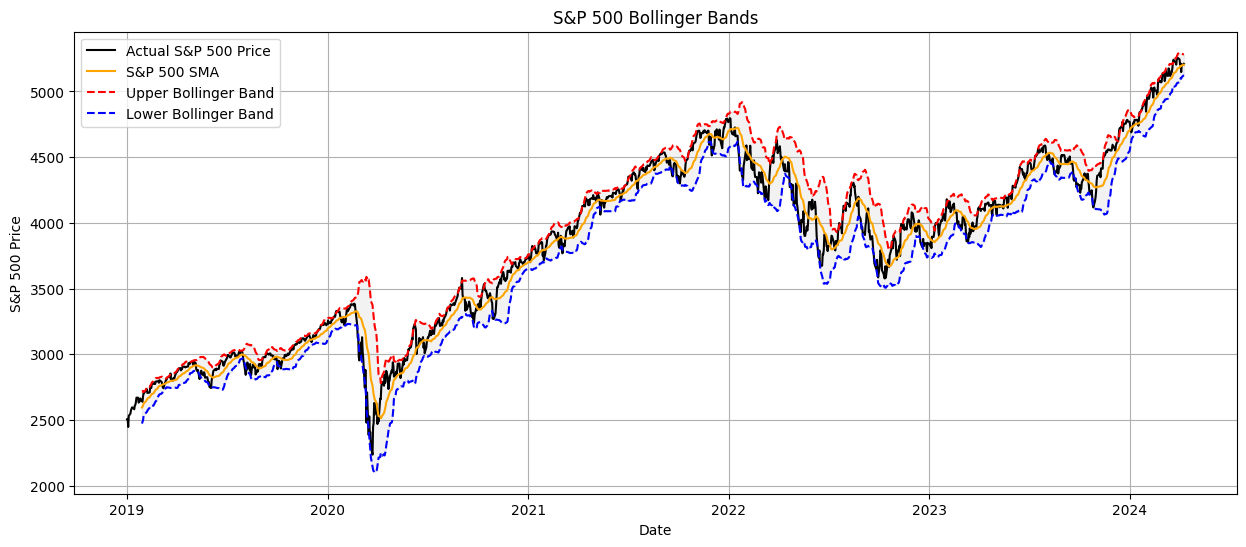

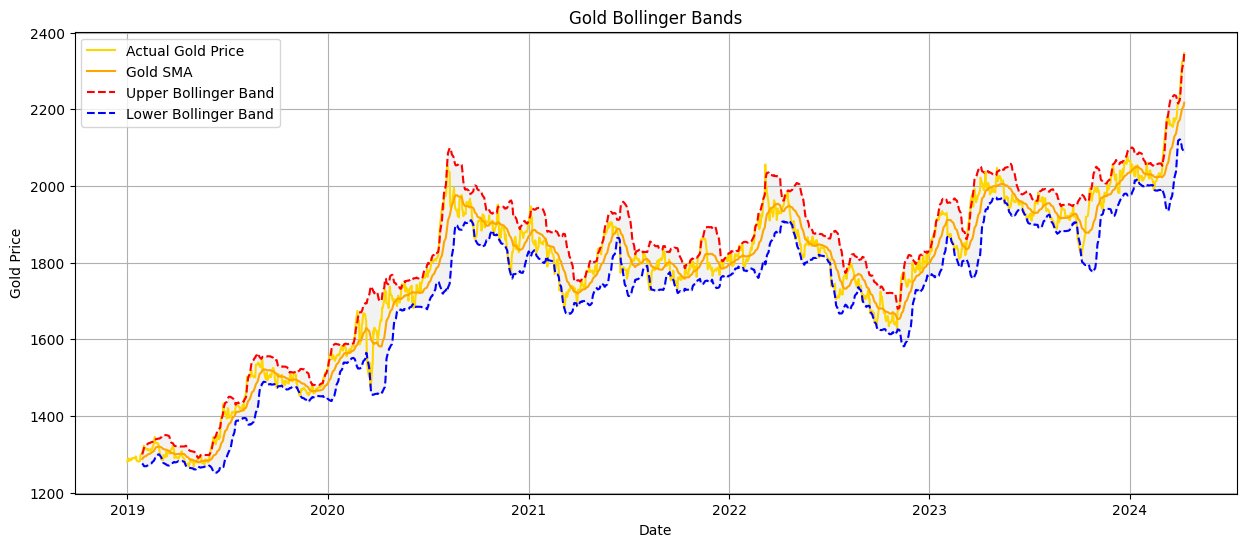

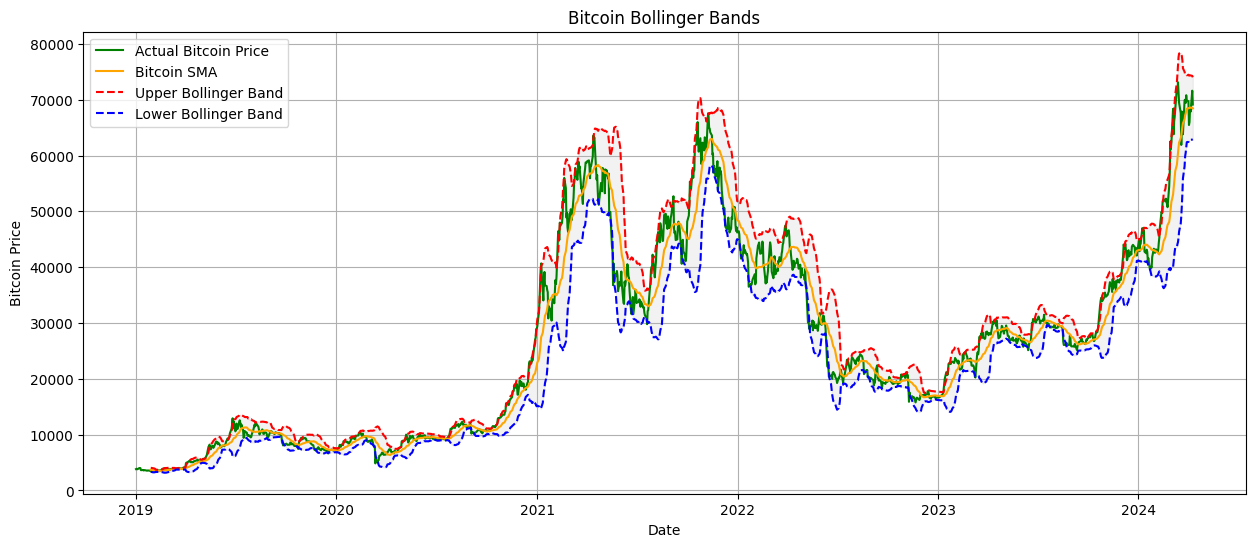

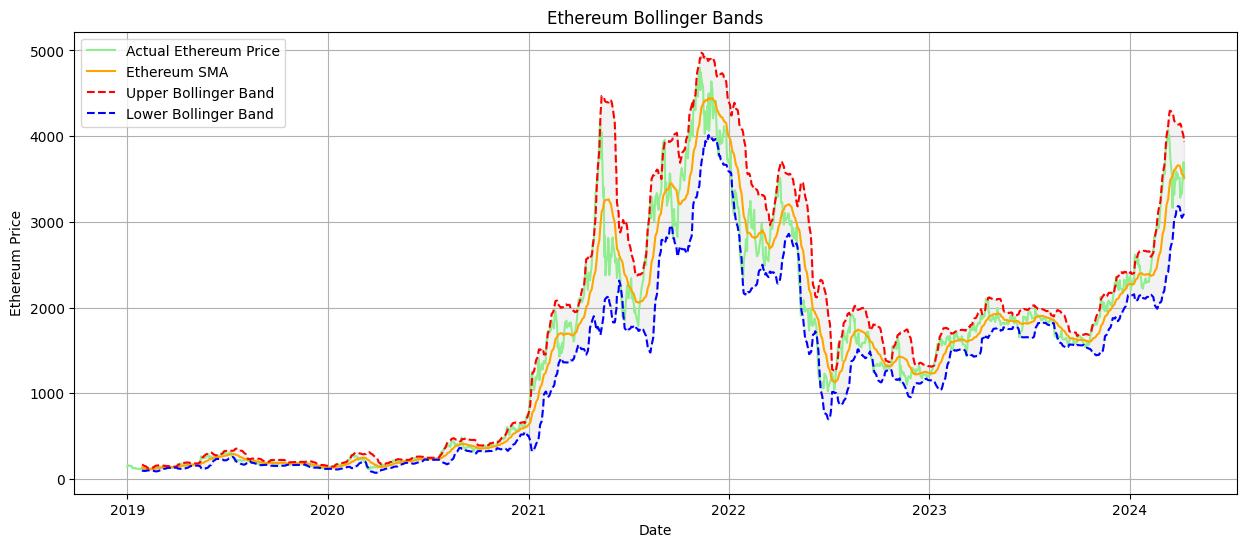

In [30]:
def calculate_bollinger_bands(df, column, window=20):
    df[f'{column}_SMA'] = df[column].rolling(window=window).mean()
    df[f'{column}_STD'] = df[column].rolling(window=window).std()
    df[f'{column}_Upper_Band'] = df[f'{column}_SMA'] + 2 * df[f'{column}_STD']
    df[f'{column}_Lower_Band'] = df[f'{column}_SMA'] - 2 * df[f'{column}_STD']
    return df

def plot_bollinger_bands(df, column, asset_name, color):
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[column], label=f'Actual {asset_name} Price', color=color)
    plt.plot(df.index, df[f'{column}_SMA'], label=f'{asset_name} SMA', color='orange')
    plt.plot(df.index, df[f'{column}_Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
    plt.plot(df.index, df[f'{column}_Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='blue')
    plt.fill_between(df.index, df[f'{column}_Lower_Band'], df[f'{column}_Upper_Band'], color='grey', alpha=0.1)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{asset_name} Price')
    plt.title(f'{asset_name} Bollinger Bands')
    plt.grid()
    plt.show()

# Load the data
data_path = 'DataCapstone.csv'
data = pd.read_csv(data_path, delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Ensure all data is in the correct format, replacing commas and spaces if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(' ', '').str.replace(',', '.').astype(float)

# List of assets for Bollinger Bands analysis
assets_colors = {
    'S&P 500 PRICE IN USD': 'black',
    'GOLD PRICE IN USD': 'gold',
    'BITCOIN PRICE IN USD': 'green',
    'ETHEREUM PRICE IN USD': 'lightgreen'
}

# Calculate Bollinger Bands for each asset
for asset in assets_colors:
    data = calculate_bollinger_bands(data, asset)

# Plot Bollinger Bands for each asset individually
plot_bollinger_bands(data, 'S&P 500 PRICE IN USD', 'S&P 500', assets_colors['S&P 500 PRICE IN USD'])
plot_bollinger_bands(data, 'GOLD PRICE IN USD', 'Gold', assets_colors['GOLD PRICE IN USD'])
plot_bollinger_bands(data, 'BITCOIN PRICE IN USD', 'Bitcoin', assets_colors['BITCOIN PRICE IN USD'])
plot_bollinger_bands(data, 'ETHEREUM PRICE IN USD', 'Ethereum', assets_colors['ETHEREUM PRICE IN USD'])

# LINEAR REGRESSION

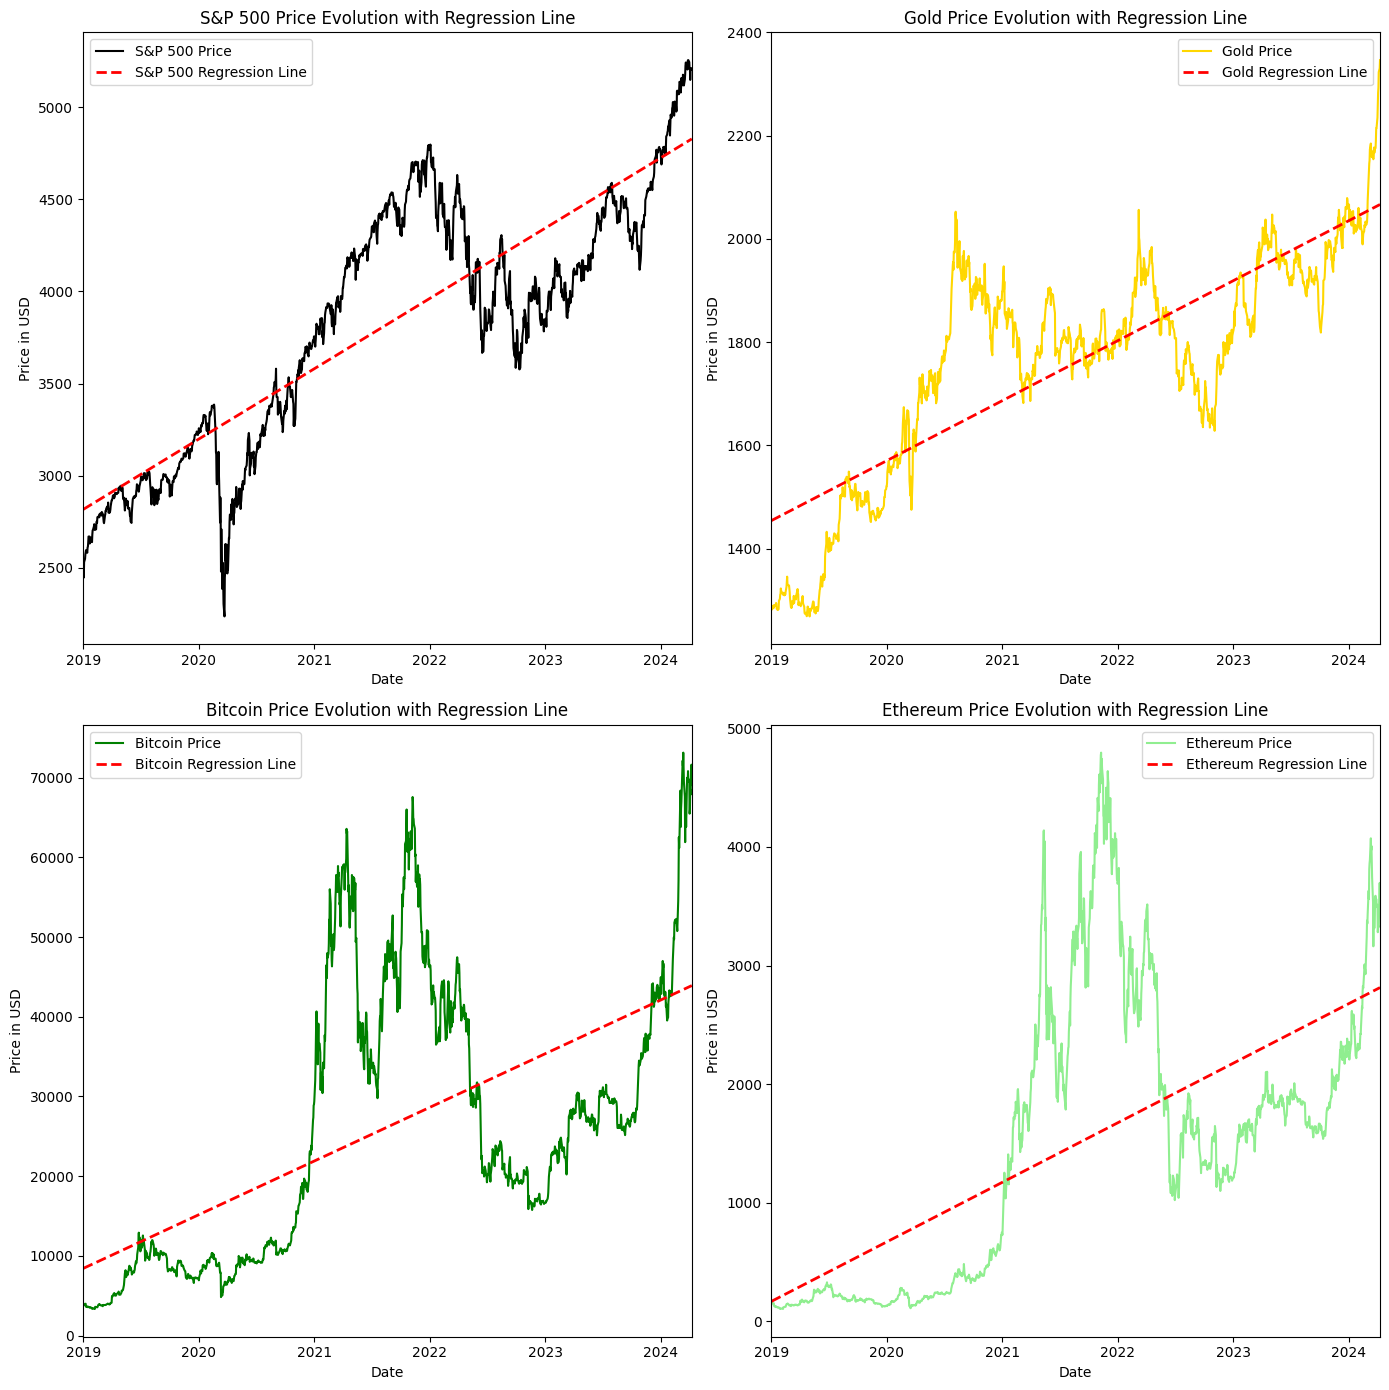

In [11]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Filter data to start from January 1, 2019
start_date = pd.Timestamp('2019-01-01')
data = data[data['Date'] >= start_date]

# Prepare data for regression
# Convert date to ordinal numbers for regression analysis
dates = date2num(data['Date'])

# Function to perform linear regression and plot results
def plot_regression(x, y, ax, label, color):
    # Reshape data for scikit-learn
    x = x.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predict values
    y_pred = model.predict(x)
    
    # Plotting the actual data
    ax.plot(data['Date'], y, color=color, label=f'{label} Price')
    
    # Overlay the regression line
    ax.plot(data['Date'], y_pred, color='red', linewidth=2, linestyle='--', label=f'{label} Regression Line')
    ax.set_title(f'{label} Price Evolution with Regression Line')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price in USD')
    ax.legend()

    # Adjust the x-axis to start from the specific date
    ax.set_xlim([start_date, data['Date'].max()])

# Create subplots in a 2x2 configuration
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Plot each asset with its regression line
plot_regression(dates, data['S&P 500 PRICE IN USD'], axs[0, 0], 'S&P 500', 'black')
plot_regression(dates, data['GOLD PRICE IN USD'], axs[0, 1], 'Gold', 'gold')
plot_regression(dates, data['BITCOIN PRICE IN USD'], axs[1, 0], 'Bitcoin', 'green')
plot_regression(dates, data['ETHEREUM PRICE IN USD'], axs[1, 1], 'Ethereum', 'lightgreen')

# Improve layout and spacing
plt.tight_layout()
plt.show()

In [12]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type and filter data to start from January 1, 2019
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data[data['Date'] >= '2019-01-01']

# Reset the date to start from zero (normalized date)
data['Date_num'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare data for regression
dates = data['Date_num'].values.reshape(-1, 1)

# Initialize the regression model
model = LinearRegression()

# Prepare to store regression results
regression_results = {}

# List of assets for calculating regression
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Perform regression for each asset and store results
for asset in assets:
    y = data[asset].values.reshape(-1, 1)
    model.fit(dates, y)
    predictions = model.predict(dates)
    
    # Calculate R-squared
    r_squared = model.score(dates, y)
    # Calculate Adjusted R-squared
    n = len(y)  # number of data points
    p = 1  # number of predictors
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    # Store the regression details
    regression_results[asset] = {
        'Coefficient': model.coef_[0][0],
        'Intercept': model.intercept_[0],
        'R-squared': r_squared,
        'Adjusted R-squared': adj_r_squared
    }

# Convert the results dictionary to a DataFrame for nice table display
regression_summary_df = pd.DataFrame(regression_results).T  # Transpose to have assets as rows

# Print the DataFrame
print(regression_summary_df)

                       Coefficient    Intercept  R-squared  Adjusted R-squared
S&P 500 PRICE IN USD      1.044101  2817.390507   0.732516            0.732321
GOLD PRICE IN USD         0.318182  1454.016113   0.667284            0.667042
BITCOIN PRICE IN USD     18.428079  8433.873463   0.353313            0.352843
ETHEREUM PRICE IN USD     1.374785   167.812987   0.408799            0.408369


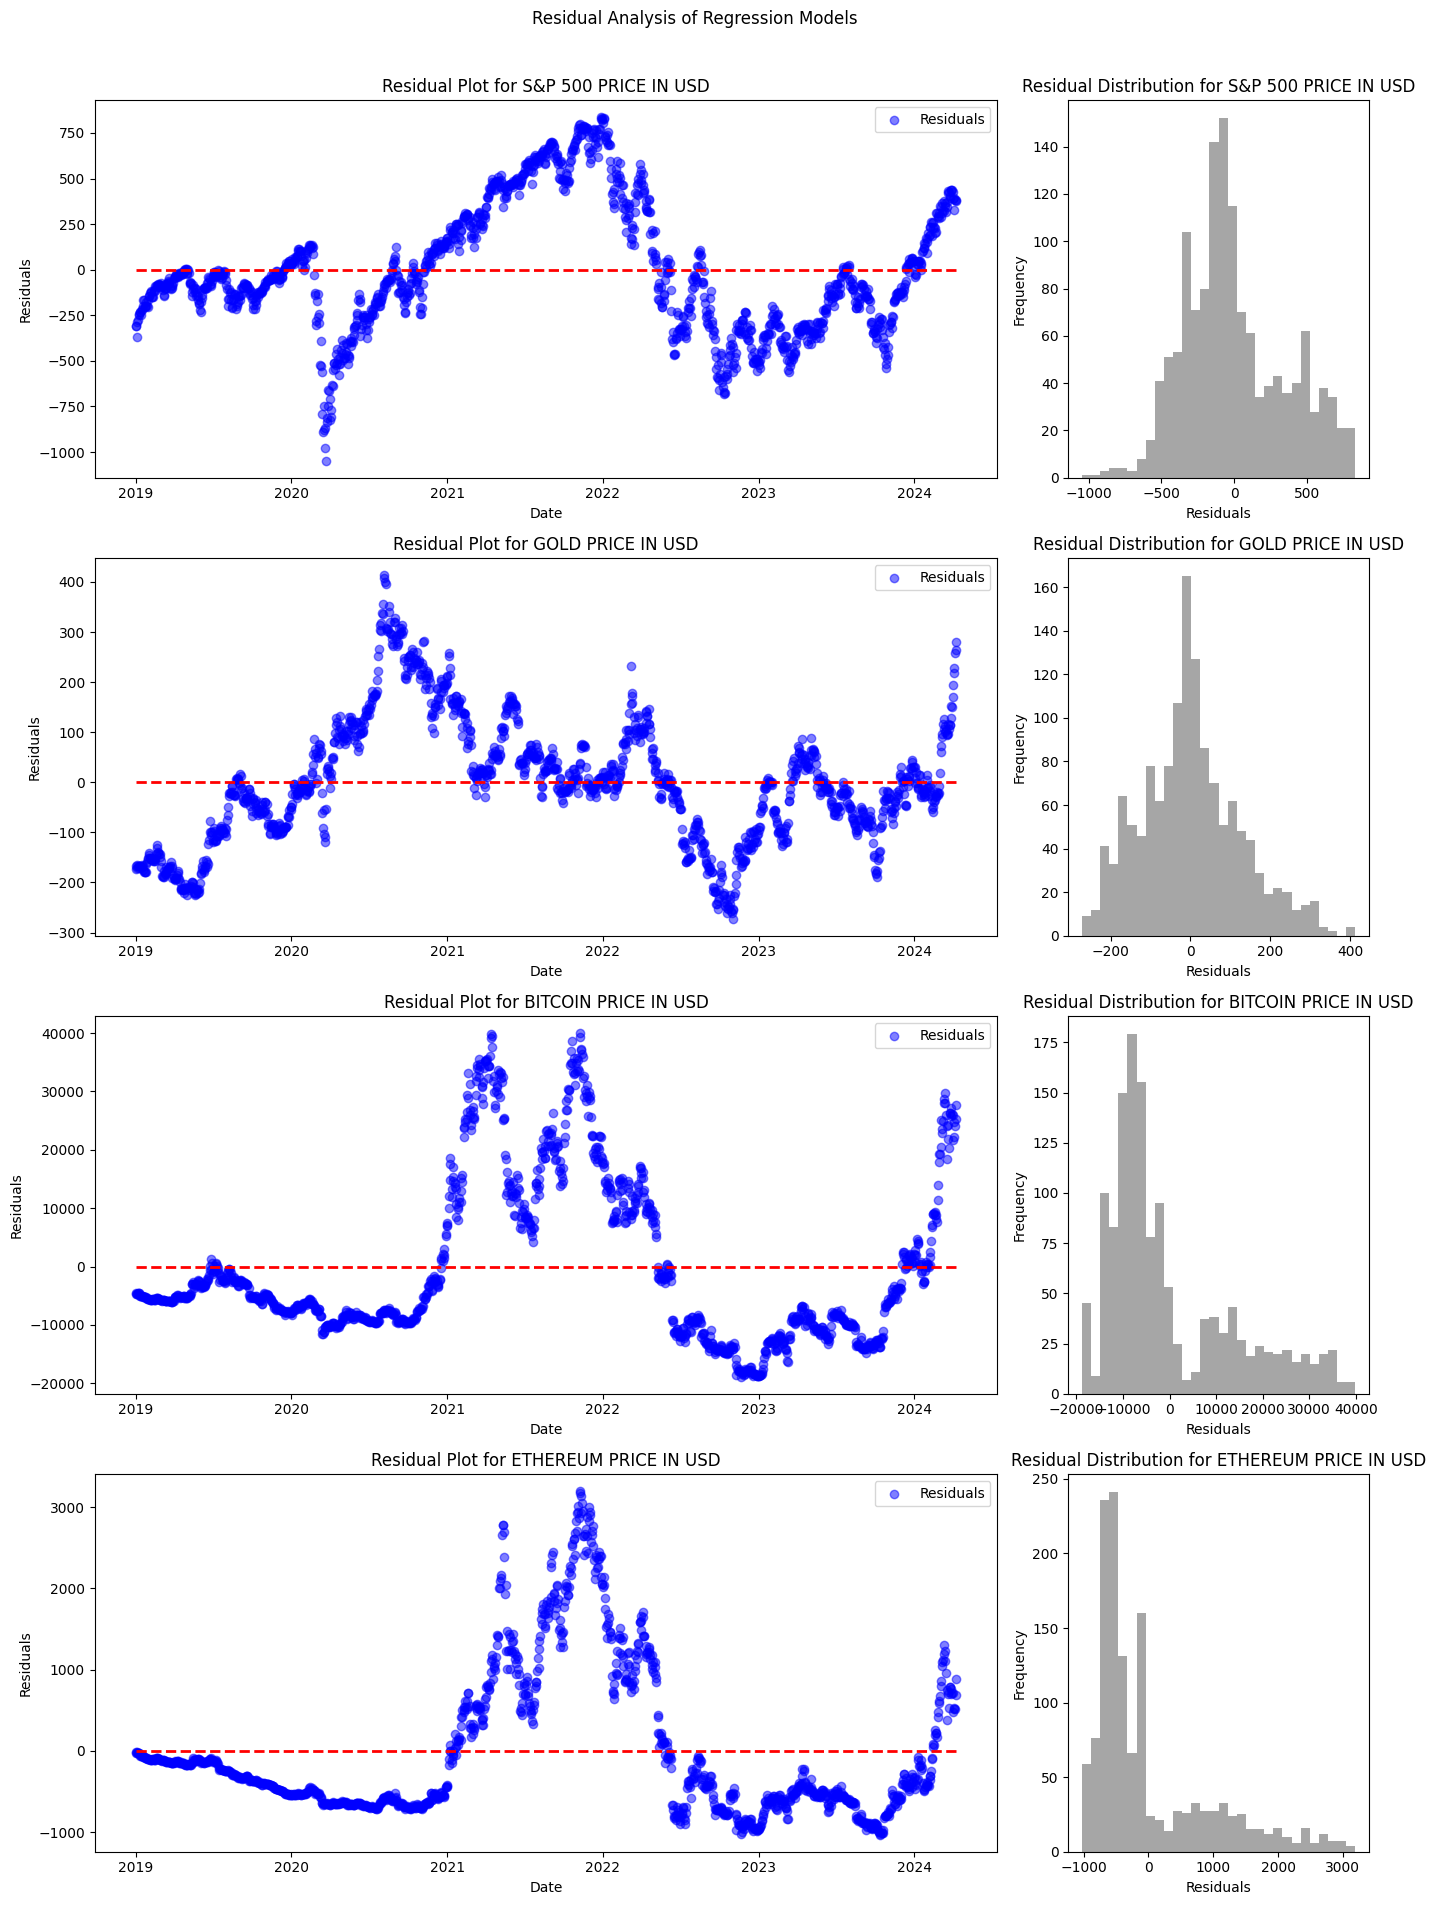

In [13]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Prepare data for regression
dates = date2num(data['Date']).reshape(-1, 1)

# Initialize the regression model
model = LinearRegression()

# List of assets to calculate regression and plot residuals
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Prepare the plot for residuals
fig, axs = plt.subplots(4, 2, figsize=(14, 20), gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Residual Analysis of Regression Models')

for idx, asset in enumerate(assets):
    y = data[asset].values.reshape(-1, 1)
    model.fit(dates, y)
    predictions = model.predict(dates)
    residuals = y - predictions

    # Scatter plot of residuals
    axs[idx, 0].scatter(data['Date'], residuals, color='blue', alpha=0.5, label='Residuals')
    axs[idx, 0].hlines(y=0, xmin=data['Date'].min(), xmax=data['Date'].max(), colors='red', linestyles='--', lw=2)
    axs[idx, 0].set_title(f'Residual Plot for {asset}')
    axs[idx, 0].set_xlabel('Date')
    axs[idx, 0].set_ylabel('Residuals')
    axs[idx, 0].legend()

    # Histogram of residuals
    axs[idx, 1].hist(residuals, bins=30, color='gray', alpha=0.7)
    axs[idx, 1].set_title(f'Residual Distribution for {asset}')
    axs[idx, 1].set_xlabel('Residuals')
    axs[idx, 1].set_ylabel('Frequency')

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# LOG-LINEAR REGRESSION

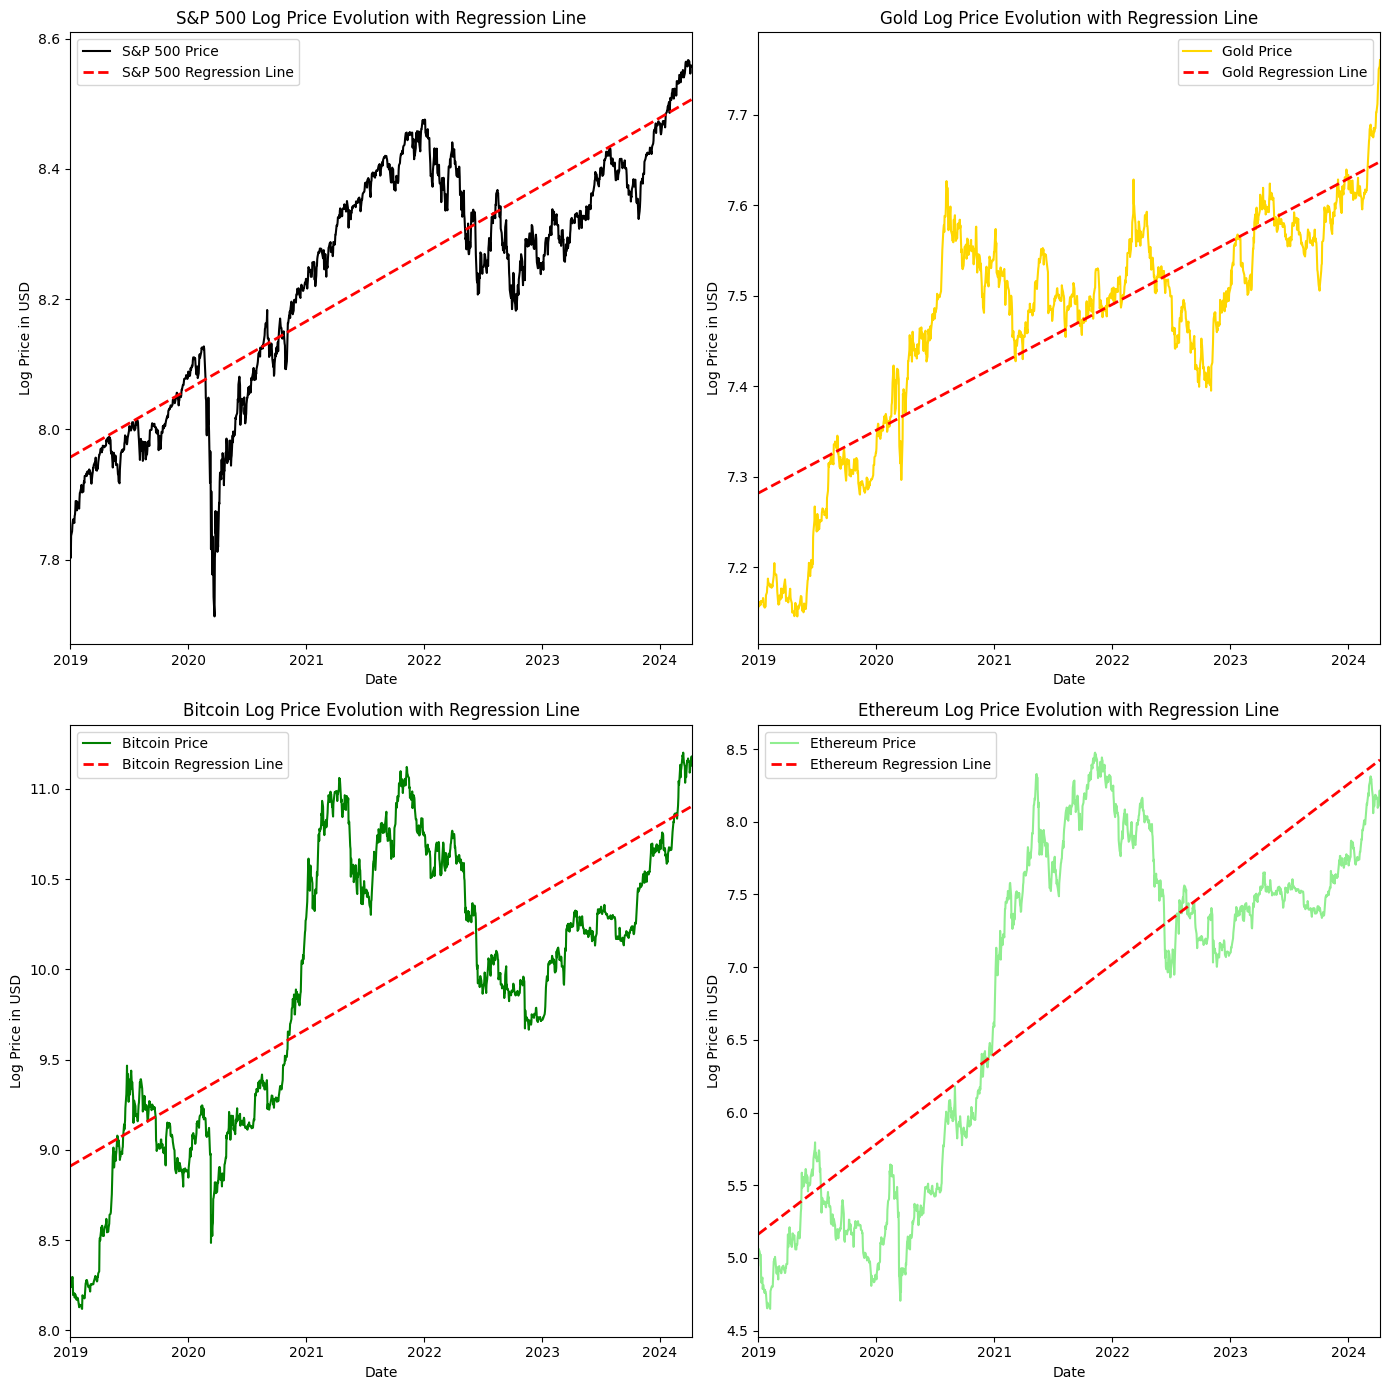

In [32]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Filter data to start from January 1, 2019
start_date = pd.Timestamp('2019-01-01')
data = data[data['Date'] >= start_date]

# Apply logarithm transformation to each asset price
data['Log S&P 500'] = np.log(data['S&P 500 PRICE IN USD'])
data['Log GOLD'] = np.log(data['GOLD PRICE IN USD'])
data['Log BITCOIN'] = np.log(data['BITCOIN PRICE IN USD'])
data['Log ETHEREUM'] = np.log(data['ETHEREUM PRICE IN USD'])

# Prepare data for regression
# Convert date to ordinal numbers for regression analysis
dates = date2num(data['Date'])

# Function to perform linear regression and plot results
def plot_regression(x, y, ax, label, color):
    # Reshape data for scikit-learn
    x = x.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predict values
    y_pred = model.predict(x)
    
    # Plotting the actual data
    ax.plot(data['Date'], y, color=color, label=f'{label} Price')
    
    # Overlay the regression line
    ax.plot(data['Date'], y_pred, color='red', linewidth=2, linestyle='--', label=f'{label} Regression Line')
    ax.set_title(f'{label} Log Price Evolution with Regression Line')
    ax.set_xlabel('Date')
    ax.set_ylabel('Log Price in USD')
    ax.legend()

    # Adjust the x-axis to start from the specific date
    ax.set_xlim([start_date, data['Date'].max()])

# Create subplots in a 2x2 configuration
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Plot each asset with its regression line
plot_regression(dates, data['Log S&P 500'], axs[0, 0], 'S&P 500', 'black')
plot_regression(dates, data['Log GOLD'], axs[0, 1], 'Gold', 'gold')
plot_regression(dates, data['Log BITCOIN'], axs[1, 0], 'Bitcoin', 'green')
plot_regression(dates, data['Log ETHEREUM'], axs[1, 1], 'Ethereum', 'lightgreen')

# Improve layout and spacing
plt.tight_layout()
plt.show()

In [14]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods et en supprimant les espaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type and filter data to start from January 1, 2019
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data[data['Date'] >= '2019-01-01']

# Reset the date to start from zero (normalized date)
data['Date_num'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare data for regression
dates = data['Date_num'].values.reshape(-1, 1)

# Apply logarithmic transformation
data['Log S&P 500'] = np.log(data['S&P 500 PRICE IN USD'])
data['Log GOLD'] = np.log(data['GOLD PRICE IN USD'])
data['Log BITCOIN'] = np.log(data['BITCOIN PRICE IN USD'])
data['Log ETHEREUM'] = np.log(data['ETHEREUM PRICE IN USD'])

# Initialize the regression model
model = LinearRegression()

# Prepare to store regression results
regression_results = {}

# List of assets for calculating regression (logarithmic prices)
log_assets = ['Log S&P 500', 'Log GOLD', 'Log BITCOIN', 'Log ETHEREUM']

# Perform regression for each asset and store results
for asset in log_assets:
    y = data[asset].values.reshape(-1, 1)
    model.fit(dates, y)
    predictions = model.predict(dates)
    
    # Calculate R-squared
    r_squared = model.score(dates, y)
    # Calculate Adjusted R-squared
    n = len(y)  # number of data points
    p = 1  # number of predictors
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    # Store the regression details
    regression_results[asset] = {
        'Coefficient': model.coef_[0][0],
        'Intercept': model.intercept_[0],
        'R-squared': r_squared,
        'Adjusted R-squared': adj_r_squared
    }

# Convert the results dictionary to a DataFrame for nice table display
regression_summary_df = pd.DataFrame(regression_results).T  # Transpose to have assets as rows

# Print the DataFrame
print(regression_summary_df)

              Coefficient  Intercept  R-squared  Adjusted R-squared
Log S&P 500      0.000285   7.957366   0.737426            0.737235
Log GOLD         0.000190   7.281805   0.657162            0.656913
Log BITCOIN      0.001035   8.910103   0.539127            0.538791
Log ETHEREUM     0.001695   5.163237   0.655123            0.654872


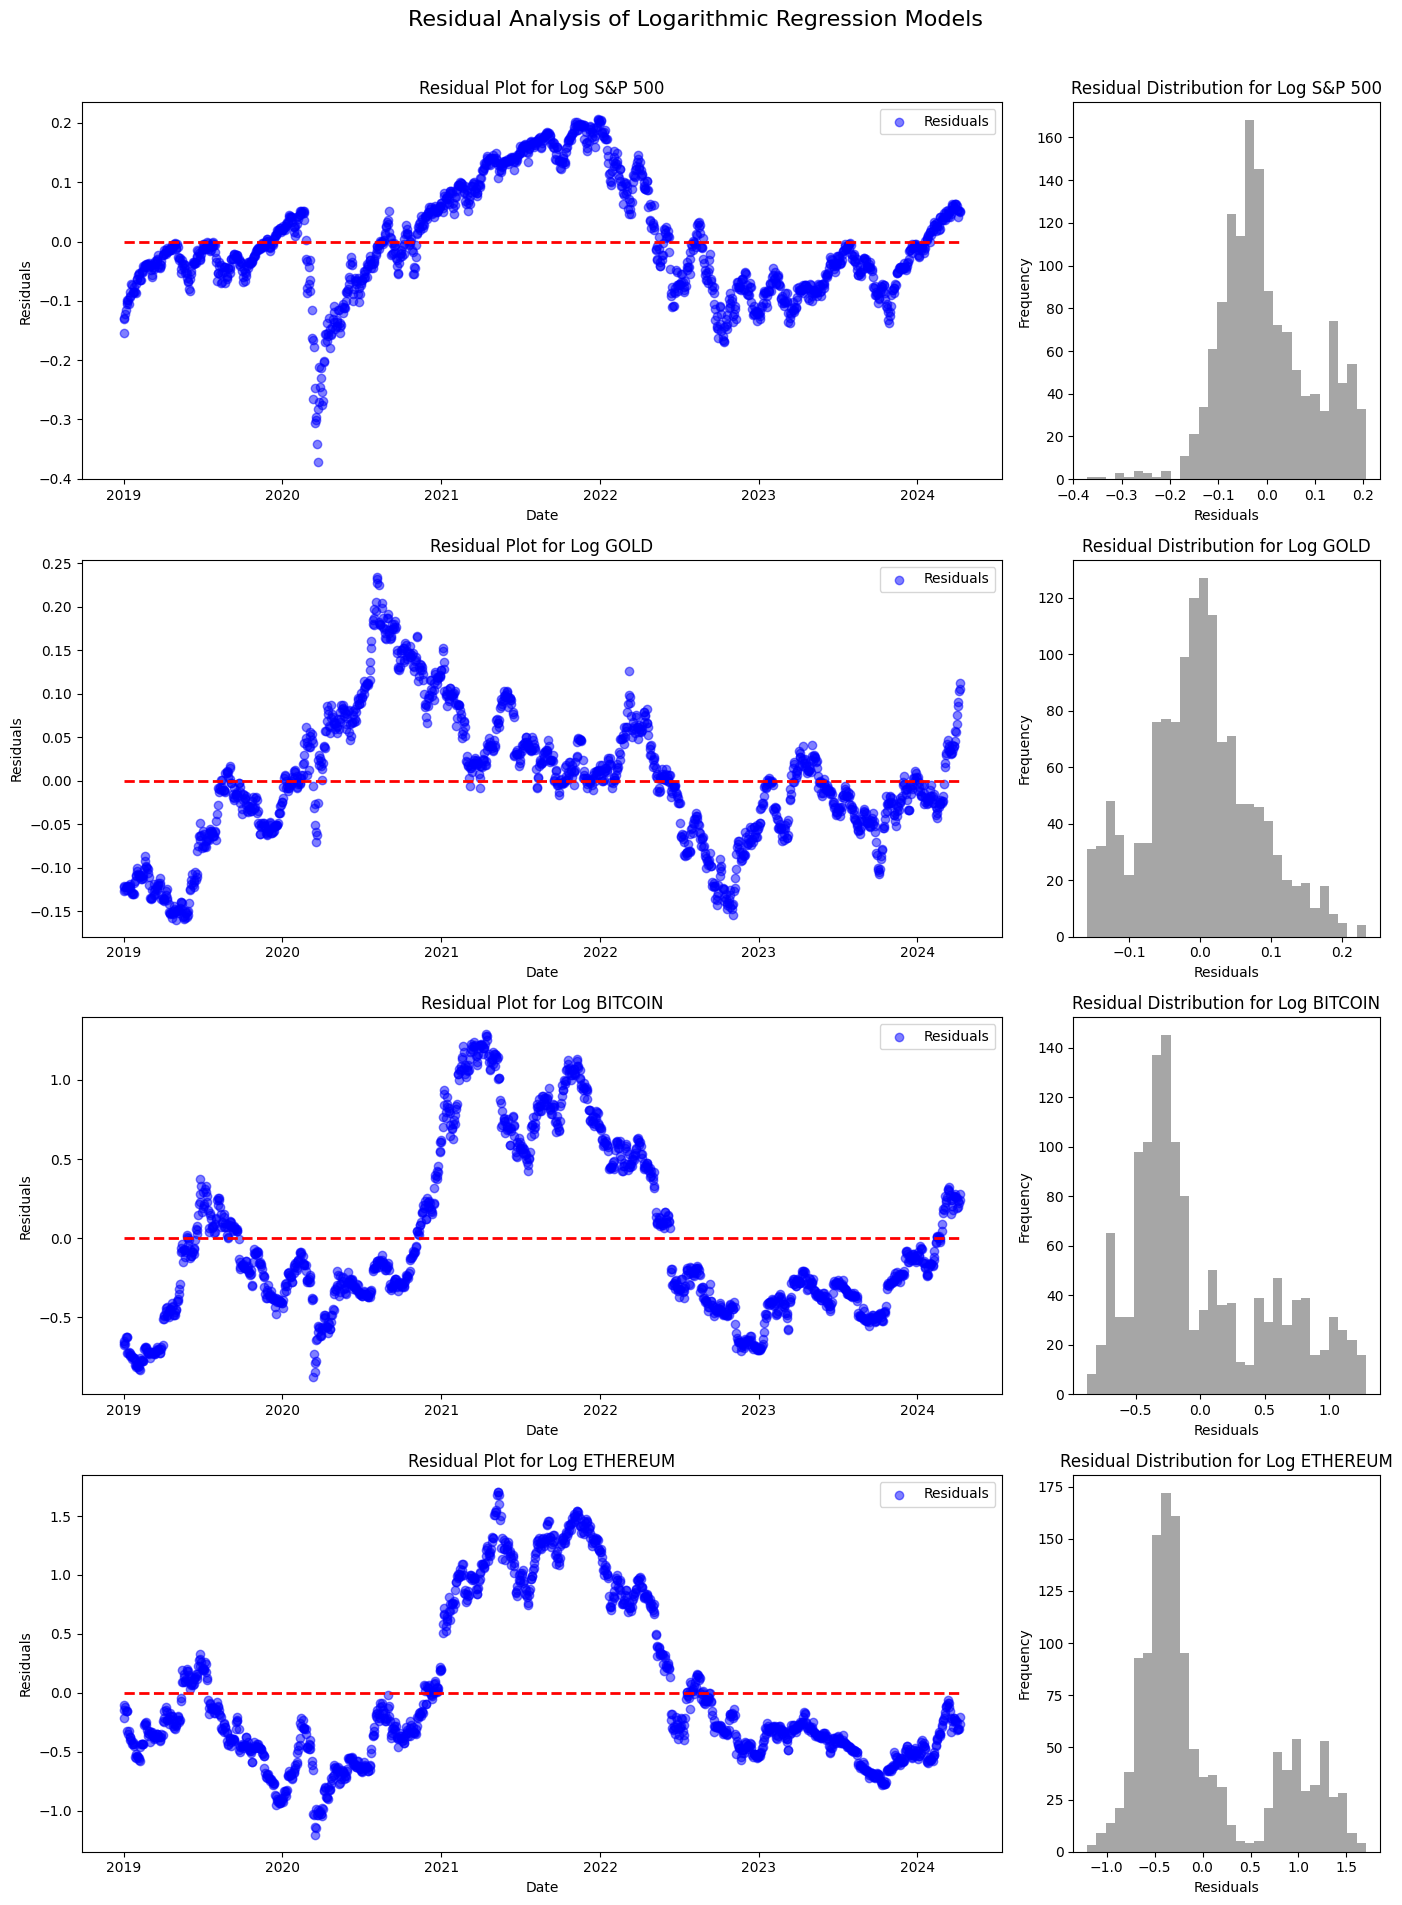

In [34]:
# Load the data specifying the column separator
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal='.')

# Strip any extra spaces from the column names
data.columns = data.columns.str.strip()

# Convert the data in the columns to float after replacing commas with periods and removing spaces
data['S&P 500 PRICE IN USD'] = data['S&P 500 PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['GOLD PRICE IN USD'] = data['GOLD PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['BITCOIN PRICE IN USD'] = data['BITCOIN PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['ETHEREUM PRICE IN USD'] = data['ETHEREUM PRICE IN USD'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Filter data to start from January 1, 2019
data = data[data['Date'] >= '2019-01-01']

# Apply logarithm transformation to each asset price
data['Log S&P 500'] = np.log(data['S&P 500 PRICE IN USD'])
data['Log GOLD'] = np.log(data['GOLD PRICE IN USD'])
data['Log BITCOIN'] = np.log(data['BITCOIN PRICE IN USD'])
data['Log ETHEREUM'] = np.log(data['ETHEREUM PRICE IN USD'])

# Prepare data for regression
dates = date2num(data['Date']).reshape(-1, 1)

# Initialize the regression model
model = LinearRegression()

# List of assets to calculate regression and plot residuals (logarithmic prices)
log_assets = ['Log S&P 500', 'Log GOLD', 'Log BITCOIN', 'Log ETHEREUM']

# Prepare the plot for residuals
fig, axs = plt.subplots(4, 2, figsize=(14, 20), gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Residual Analysis of Logarithmic Regression Models', fontsize=16)

for idx, asset in enumerate(log_assets):
    y = data[asset].values.reshape(-1, 1)
    model.fit(dates, y)
    predictions = model.predict(dates)
    residuals = y - predictions

    # Scatter plot of residuals
    axs[idx, 0].scatter(data['Date'], residuals, color='blue', alpha=0.5, label='Residuals')
    axs[idx, 0].hlines(y=0, xmin=data['Date'].min(), xmax=data['Date'].max(), colors='red', linestyles='--', lw=2)
    axs[idx, 0].set_title(f'Residual Plot for {asset}', fontsize=12)
    axs[idx, 0].set_xlabel('Date', fontsize=10)
    axs[idx, 0].set_ylabel('Residuals', fontsize=10)
    axs[idx, 0].legend()

    # Histogram of residuals
    axs[idx, 1].hist(residuals, bins=30, color='gray', alpha=0.7)
    axs[idx, 1].set_title(f'Residual Distribution for {asset}', fontsize=12)
    axs[idx, 1].set_xlabel('Residuals', fontsize=10)
    axs[idx, 1].set_ylabel('Frequency', fontsize=10)

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# ARIMA MODEL

In [15]:
# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Ensure all data is in the correct format, replacing commas and spaces if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(' ', '').str.replace(',', '.').astype(float)

# Function to perform and display ADF test results
def perform_adf_test(series, name):
    result = adfuller(series.dropna())  # Removing any NA values if present
    print(f'Results of Dickey-Fuller Test for {name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')
    
    # Determine stationarity based on the p-value
    if result[1] < 0.05:
        print(f"Conclusion: {name} is stationary.\n")
    else:
        print(f"Conclusion: {name} is not stationary and will be differenced.\n")
        # Perform differencing
        differenced_series = series.diff().dropna()
        perform_adf_test(differenced_series, name + " - Differenced")

# List of asset column names
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Perform ADF test for each asset
for asset in assets:
    perform_adf_test(data[asset], asset)

Results of Dickey-Fuller Test for S&P 500 PRICE IN USD:
ADF Statistic: -0.9870578021449633
p-value: 0.7579553538952977
Critical Values:
    1%: -3.4351497363134746
    5%: -2.863659724044779
    10%: -2.567898540568101
Conclusion: S&P 500 PRICE IN USD is not stationary and will be differenced.

Results of Dickey-Fuller Test for S&P 500 PRICE IN USD - Differenced:
ADF Statistic: -11.162688677016426
p-value: 2.762693373177113e-20
Critical Values:
    1%: -3.4351497363134746
    5%: -2.863659724044779
    10%: -2.567898540568101
Conclusion: S&P 500 PRICE IN USD - Differenced is stationary.

Results of Dickey-Fuller Test for GOLD PRICE IN USD:
ADF Statistic: -0.9296583261191678
p-value: 0.7780486928717056
Critical Values:
    1%: -3.4351147636466535
    5%: -2.863644291237025
    10%: -2.5678903221157023
Conclusion: GOLD PRICE IN USD is not stationary and will be differenced.

Results of Dickey-Fuller Test for GOLD PRICE IN USD - Differenced:
ADF Statistic: -36.85861305983253
p-value: 0.0


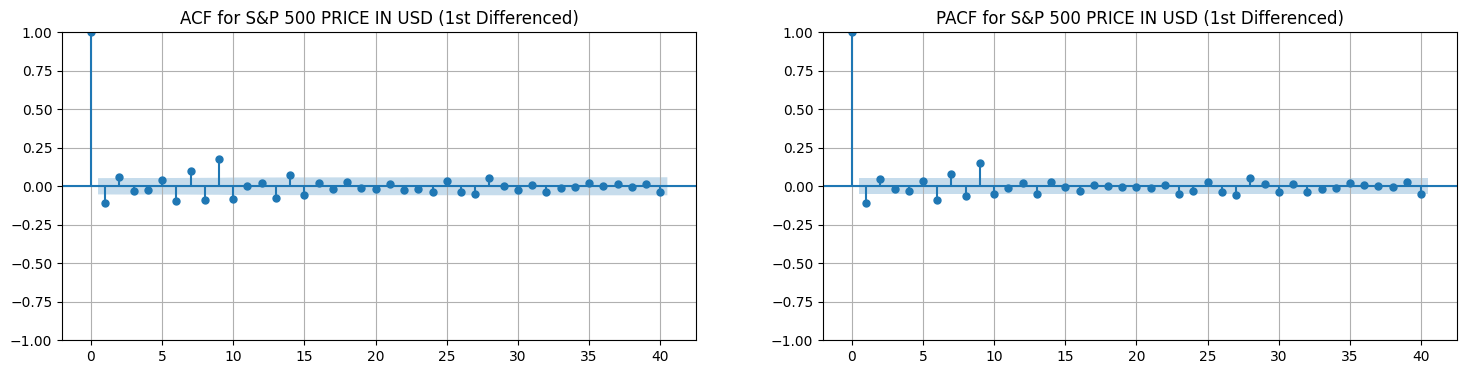

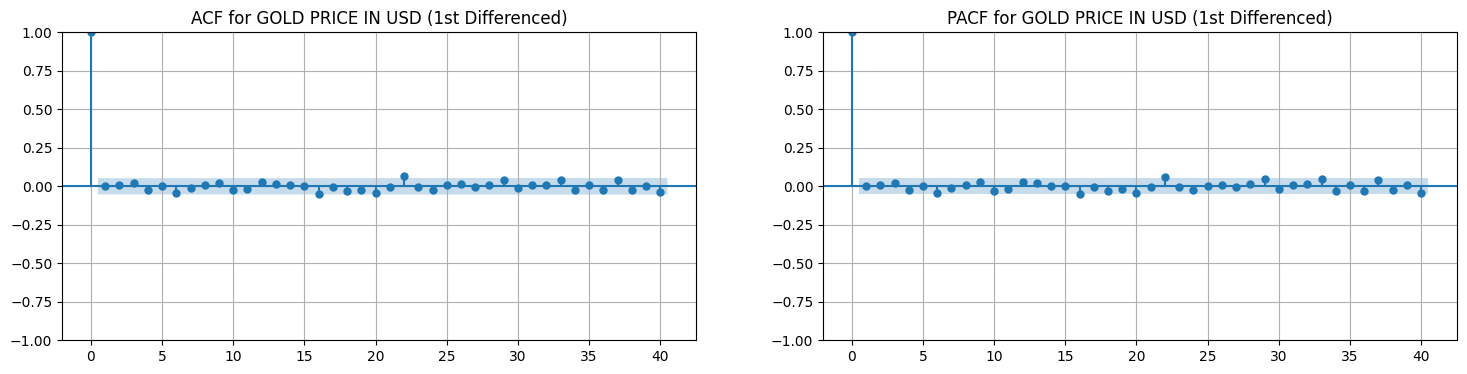

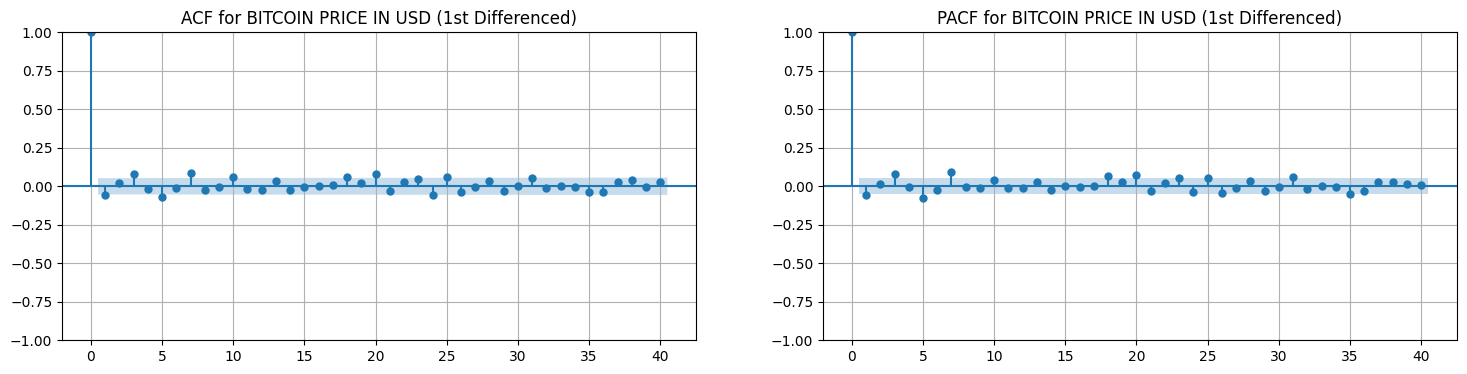

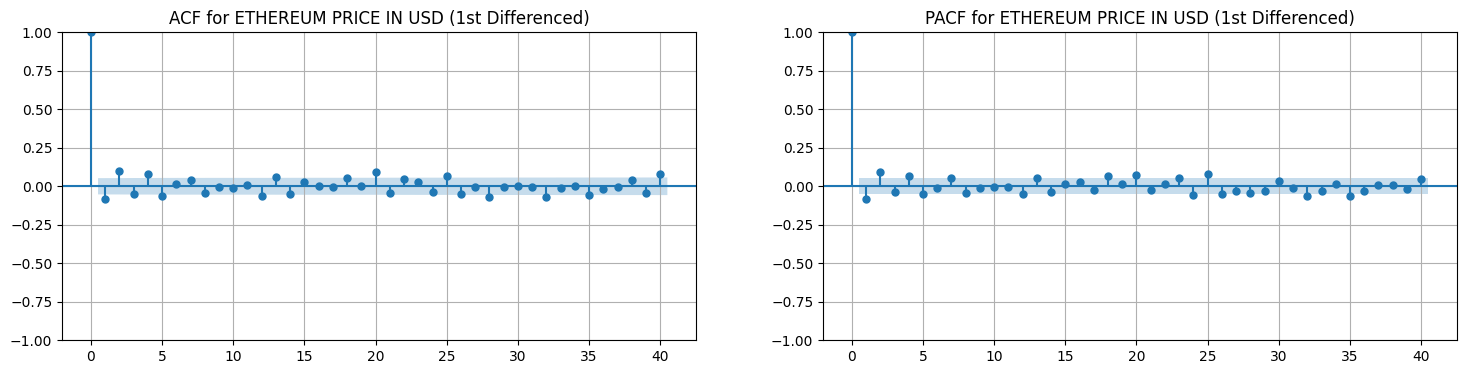

In [16]:
# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Ensure all data is in the correct format, replacing commas and spaces if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(' ', '').str.replace(',', '.').astype(float)

# List of asset column names
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Function to plot ACF and PACF after first differencing
def plot_acf_pacf_differenced(series, name):
    # First differencing
    differenced_series = series.diff().dropna()

    # Plotting ACF
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
    plot_acf(differenced_series, lags=40, ax=ax1, title=f'ACF for {name} (1st Differenced)')
    ax1.grid(True)
    
    # Plotting PACF
    plot_pacf(differenced_series, lags=40, ax=ax2, title=f'PACF for {name} (1st Differenced)')
    ax2.grid(True)
    
    plt.show()

# Perform ACF and PACF for each asset after differencing
for asset in assets:
    plot_acf_pacf_differenced(data[asset].dropna(), asset)

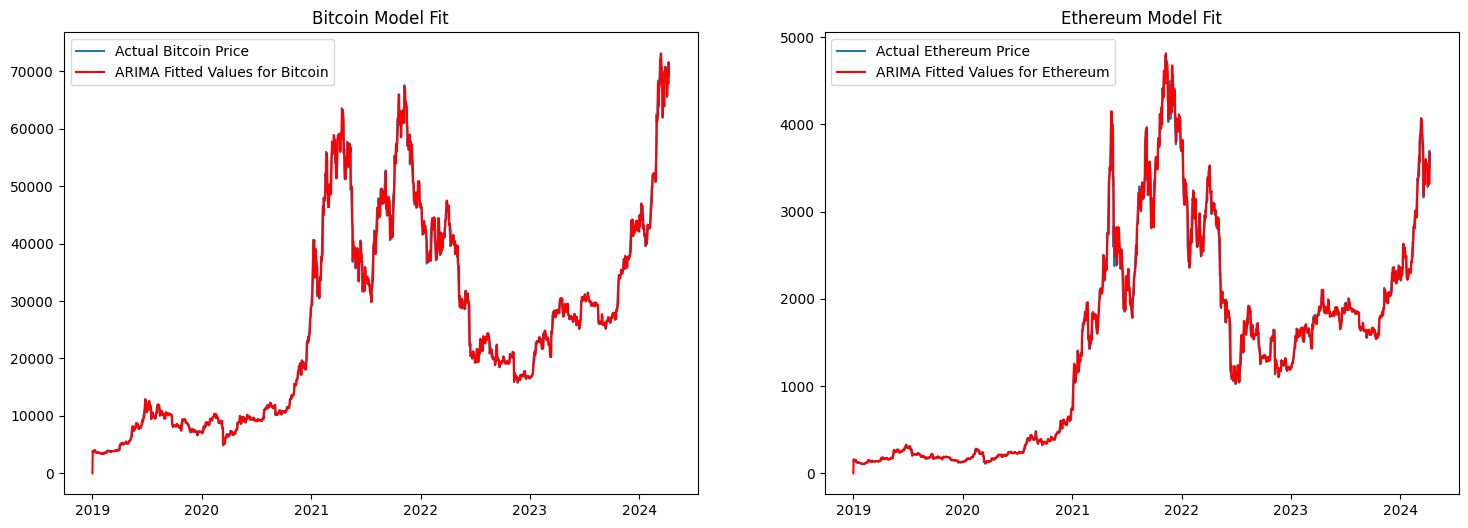

In [18]:
data.index = pd.to_datetime(data.index)
data = data.asfreq('B')

# Fit ARIMA model for Bitcoin
btc_model = ARIMA(data['BITCOIN PRICE IN USD'], order=(1, 1, 1))
btc_model_fit = btc_model.fit()

# Fit ARIMA model for Ethereum
eth_model = ARIMA(data['ETHEREUM PRICE IN USD'], order=(1, 1, 1))
eth_model_fit = eth_model.fit()

# Get the fitted values for Bitcoin and Ethereum
btc_fitted_values = btc_model_fit.fittedvalues
eth_fitted_values = eth_model_fit.fittedvalues

# Setup the plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Bitcoin
ax[0].plot(data['BITCOIN PRICE IN USD'], label='Actual Bitcoin Price')
ax[0].plot(btc_fitted_values, label='ARIMA Fitted Values for Bitcoin', color='red')
ax[0].set_title('Bitcoin Model Fit')
ax[0].legend()

# Plot for Ethereum
ax[1].plot(data['ETHEREUM PRICE IN USD'], label='Actual Ethereum Price')
ax[1].plot(eth_fitted_values, label='ARIMA Fitted Values for Ethereum', color='red')
ax[1].set_title('Ethereum Model Fit')
ax[1].legend()

plt.show()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Replace commas and convert to float
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Define the assets
assets = ['BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Function to optimize ARIMA parameters using both AIC and BIC
def optimize_arima(series, p_range, d_range, q_range):
    best_aic = np.inf
    best_bic = np.inf
    best_aic_order = None
    best_bic_order = None
    best_aic_model = None
    best_bic_model = None

    warnings.filterwarnings('ignore')

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    aic = results.aic
                    bic = results.bic
                    if aic < best_aic:
                        best_aic = aic
                        best_aic_order = (p, d, q)
                        best_aic_model = results
                    if bic < best_bic:
                        best_bic = bic
                        best_bic_order = (p, d, q)
                        best_bic_model = results
                except:
                    continue

    print(f'Best ARIMA{best_aic_order} AIC: {best_aic}')
    print(f'Best ARIMA{best_bic_order} BIC: {best_bic}')
    return best_aic_model, best_bic_model

# Example parameter ranges
p_range = range(0, 4)  # p values from 0 to 4
d_range = range(1, 4)  # d is fixed at minimum 1 but can be more
q_range = range(0, 4)  # q values from 0 to 4

# Optimize ARIMA for each asset
for asset in assets:
    print(f'\nOptimizing ARIMA parameters for {asset}')
    best_aic_model, best_bic_model = optimize_arima(data[asset].dropna(), p_range, d_range, q_range)

    print("\nSummary for the best model according to AIC:")
    print(best_aic_model.summary())

    print("\nSummary for the best model according to BIC:")
    print(best_bic_model.summary())


Optimizing ARIMA parameters for BITCOIN PRICE IN USD
Best ARIMA(2, 2, 3) AIC: 23632.94501350368
Best ARIMA(0, 2, 1) BIC: 23653.903118473398

Summary for the best model according to AIC:
                                SARIMAX Results                                 
Dep. Variable:     BITCOIN PRICE IN USD   No. Observations:                 1376
Model:                   ARIMA(2, 2, 3)   Log Likelihood              -11810.473
Date:                  Fri, 10 May 2024   AIC                          23632.945
Time:                          09:23:48   BIC                          23664.298
Sample:                      01-01-2019   HQIC                         23644.676
                           - 04-09-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1  

# PREDICTIONS ARIMA MODEL

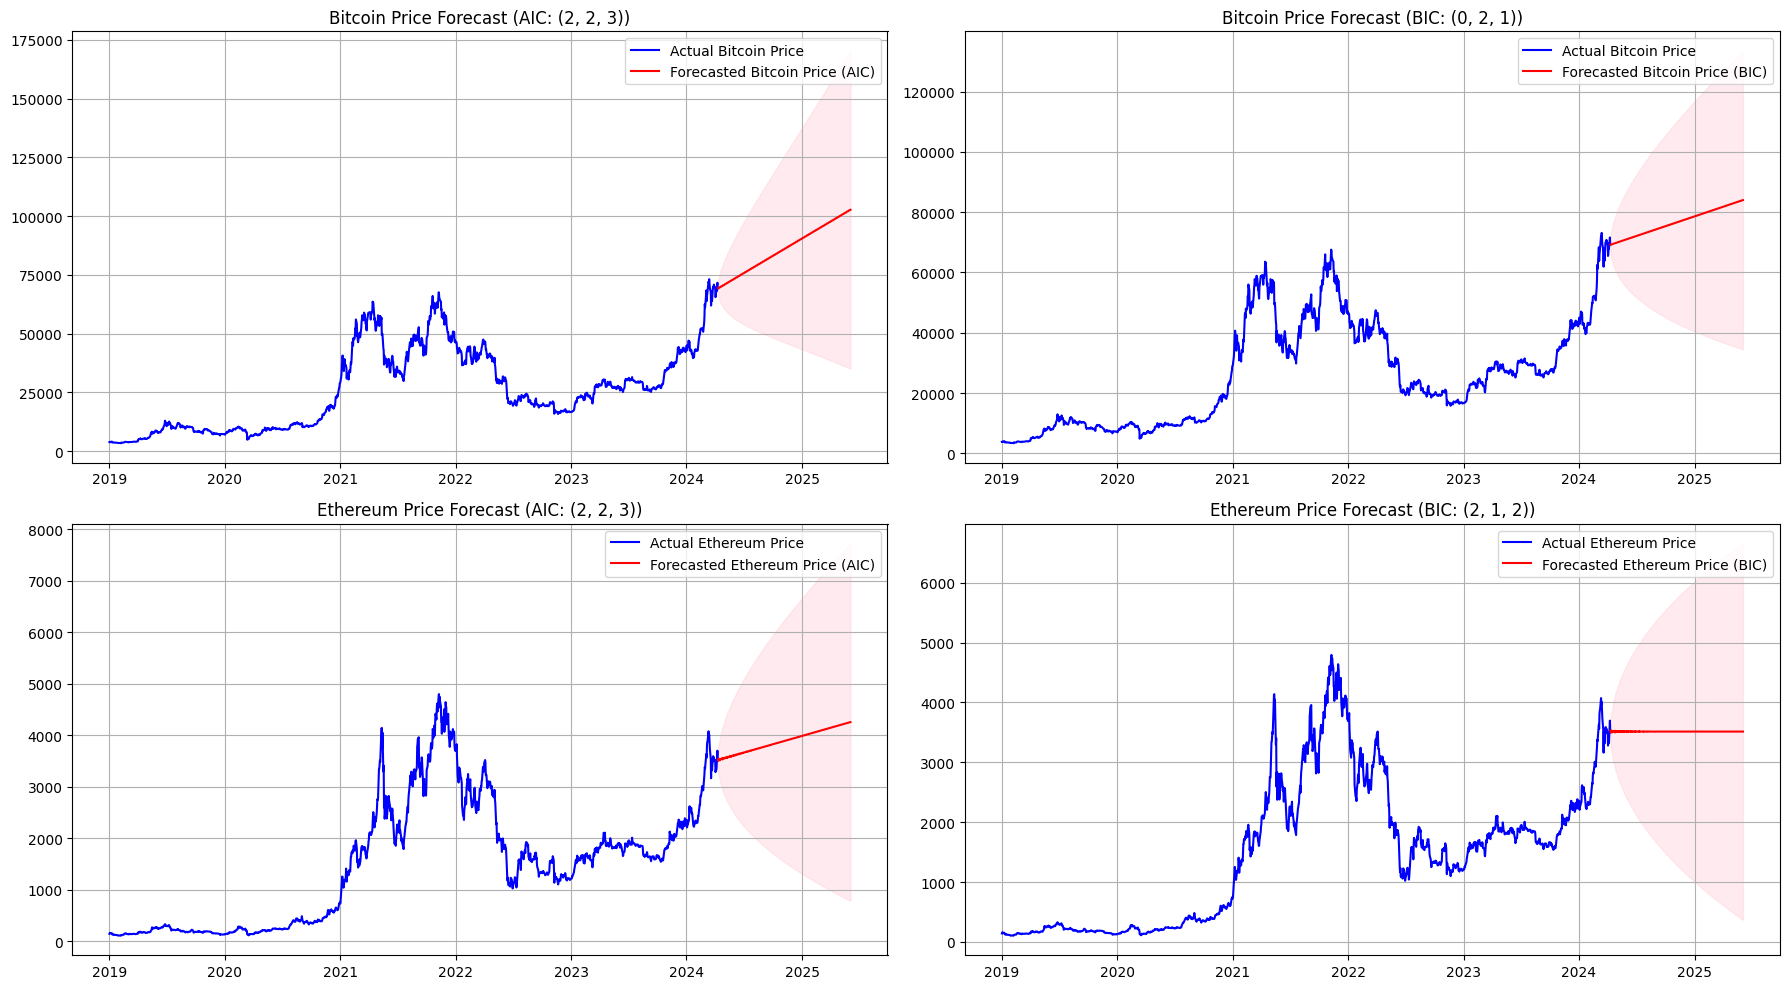

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
import pandas as pd
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Set ARIMA parameters based on AIC and BIC criteria
btc_aic_order = (2, 2, 3)
btc_bic_order = (0, 2, 1)
eth_aic_order = (2, 2, 3)
eth_bic_order = (2, 1, 2)

# Fit ARIMA models for Bitcoin
btc_aic_model = ARIMA(data['BITCOIN PRICE IN USD'], order=btc_aic_order)
btc_aic_model_fit = btc_aic_model.fit()

btc_bic_model = ARIMA(data['BITCOIN PRICE IN USD'], order=btc_bic_order)
btc_bic_model_fit = btc_bic_model.fit()

# Fit ARIMA models for Ethereum
eth_aic_model = ARIMA(data['ETHEREUM PRICE IN USD'], order=eth_aic_order)
eth_aic_model_fit = eth_aic_model.fit()

eth_bic_model = ARIMA(data['ETHEREUM PRICE IN USD'], order=eth_bic_order)
eth_bic_model_fit = eth_bic_model.fit()

# Forecast the next 300 steps for Bitcoin
btc_forecast_steps = 300
btc_aic_forecast = btc_aic_model_fit.get_forecast(steps=btc_forecast_steps)
btc_aic_mean = btc_aic_forecast.predicted_mean
btc_aic_conf_int = btc_aic_forecast.conf_int()

btc_bic_forecast = btc_bic_model_fit.get_forecast(steps=btc_forecast_steps)
btc_bic_mean = btc_bic_forecast.predicted_mean
btc_bic_conf_int = btc_bic_forecast.conf_int()

# Forecast the next 300 steps for Ethereum
eth_forecast_steps = 300
eth_aic_forecast = eth_aic_model_fit.get_forecast(steps=eth_forecast_steps)
eth_aic_mean = eth_aic_forecast.predicted_mean
eth_aic_conf_int = eth_aic_forecast.conf_int()

eth_bic_forecast = eth_bic_model_fit.get_forecast(steps=eth_forecast_steps)
eth_bic_mean = eth_bic_forecast.predicted_mean
eth_bic_conf_int = eth_bic_forecast.conf_int()

# Setup the plot
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Bitcoin AIC Plot
axes[0, 0].plot(data.index, data['BITCOIN PRICE IN USD'], label='Actual Bitcoin Price', color='blue')
axes[0, 0].plot(btc_aic_mean.index, btc_aic_mean, label='Forecasted Bitcoin Price (AIC)', color='red')
axes[0, 0].fill_between(btc_aic_mean.index, btc_aic_conf_int.iloc[:, 0], btc_aic_conf_int.iloc[:, 1], color='pink', alpha=0.3)
axes[0, 0].set_title('Bitcoin Price Forecast (AIC: (2, 2, 3))')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Bitcoin BIC Plot
axes[0, 1].plot(data.index, data['BITCOIN PRICE IN USD'], label='Actual Bitcoin Price', color='blue')
axes[0, 1].plot(btc_bic_mean.index, btc_bic_mean, label='Forecasted Bitcoin Price (BIC)', color='red')
axes[0, 1].fill_between(btc_bic_mean.index, btc_bic_conf_int.iloc[:, 0], btc_bic_conf_int.iloc[:, 1], color='pink', alpha=0.3)
axes[0, 1].set_title('Bitcoin Price Forecast (BIC: (0, 2, 1))')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Ethereum AIC Plot
axes[1, 0].plot(data.index, data['ETHEREUM PRICE IN USD'], label='Actual Ethereum Price', color='blue')
axes[1, 0].plot(eth_aic_mean.index, eth_aic_mean, label='Forecasted Ethereum Price (AIC)', color='red')
axes[1, 0].fill_between(eth_aic_mean.index, eth_aic_conf_int.iloc[:, 0], eth_aic_conf_int.iloc[:, 1], color='pink', alpha=0.3)
axes[1, 0].set_title('Ethereum Price Forecast (AIC: (2, 2, 3))')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Ethereum BIC Plot
axes[1, 1].plot(data.index, data['ETHEREUM PRICE IN USD'], label='Actual Ethereum Price', color='blue')
axes[1, 1].plot(eth_bic_mean.index, eth_bic_mean, label='Forecasted Ethereum Price (BIC)', color='red')
axes[1, 1].fill_between(eth_bic_mean.index, eth_bic_conf_int.iloc[:, 0], eth_bic_conf_int.iloc[:, 1], color='pink', alpha=0.3)
axes[1, 1].set_title('Ethereum Price Forecast (BIC: (2, 1, 2))')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# LSTM MODEL WITHOUT CORRELATION WITH S&P500 AND GOLD

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Training samples: (1052, 60, 4), Test samples: (264, 60, 4)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11000     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 31,302
Trainable params: 31,302
Non-trainable params: 0
________________________________________________________

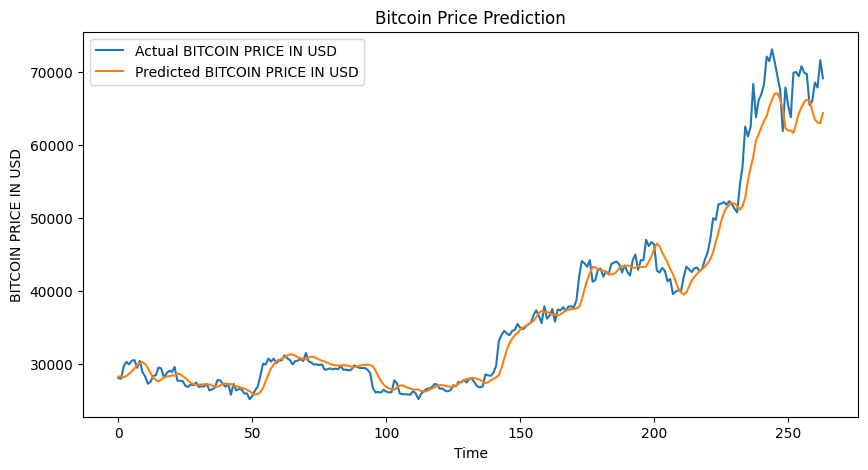

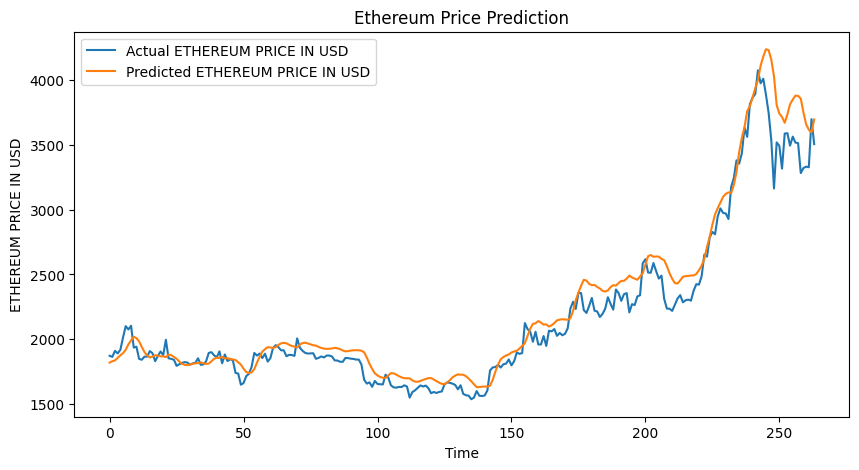

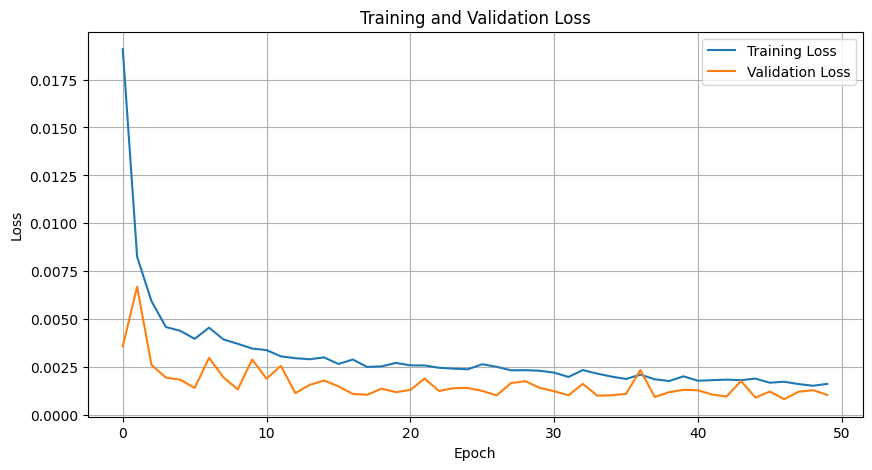

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file into a DataFrame
DataCapstone = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=',')

# Select relevant features using the given column names
btc_col = 'BITCOIN PRICE IN USD'
eth_col = 'ETHEREUM PRICE IN USD'
sp500_col = 'S&P 500 PRICE IN USD'
gold_col = 'GOLD PRICE IN USD'
features = [btc_col, eth_col, sp500_col, gold_col]

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DataCapstone[features])

# Convert to supervised format
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length][:2])  # Only Bitcoin and Ethereum prices as targets
    return np.array(x), np.array(y)

# Define sequence length
SEQ_LENGTH = 60
x, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(2)  # Predict Bitcoin and Ethereum prices only
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Predict on test data
predictions = model.predict(x_test)

# Inverse transform predictions and actual values to their original scale
y_test_inv = scaler.inverse_transform(np.concatenate([y_test, np.zeros((len(y_test), len(features) - 2))], axis=1))[:, :2]
predictions_inv = scaler.inverse_transform(np.concatenate([predictions, np.zeros((len(predictions), len(features) - 2))], axis=1))[:, :2]

# Compare predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 0], label='Actual BITCOIN PRICE IN USD')
plt.plot(predictions_inv[:, 0], label='Predicted BITCOIN PRICE IN USD')
plt.legend()
plt.xlabel('Time')
plt.ylabel('BITCOIN PRICE IN USD')
plt.title('Bitcoin Price Prediction')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 1], label='Actual ETHEREUM PRICE IN USD')
plt.plot(predictions_inv[:, 1], label='Predicted ETHEREUM PRICE IN USD')
plt.legend()
plt.xlabel('Time')
plt.ylabel('ETHEREUM PRICE IN USD')
plt.title('Ethereum Price Prediction')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

In [39]:
# Calculate evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

btc_actual = y_test_inv[:, 0]
eth_actual = y_test_inv[:, 1]
btc_predictions = predictions_inv[:, 0]
eth_predictions = predictions_inv[:, 1]

btc_mae = mean_absolute_error(btc_actual, btc_predictions)
btc_mape = mean_absolute_percentage_error(btc_actual, btc_predictions)
btc_r2 = r2_score(btc_actual, btc_predictions)

eth_mae = mean_absolute_error(eth_actual, eth_predictions)
eth_mape = mean_absolute_percentage_error(eth_actual, eth_predictions)
eth_r2 = r2_score(eth_actual, eth_predictions)

# Print evaluation metrics
print("\nBitcoin Prediction Metrics:")
print(f"Mean Absolute Error: {btc_mae}")
print(f"Mean Absolute Percentage Error: {btc_mape}%")
print(f"R-squared Score: {btc_r2}")

print("\nEthereum Prediction Metrics:")
print(f"Mean Absolute Error: {eth_mae}")
print(f"Mean Absolute Percentage Error: {eth_mape}%")
print(f"R-squared Score: {eth_r2}")


Bitcoin Prediction Metrics:
Mean Absolute Error: 1502.8202759051017
Mean Absolute Percentage Error: 3.5216085420893433%
R-squared Score: 0.968159835080644

Ethereum Prediction Metrics:
Mean Absolute Error: 104.6619032567737
Mean Absolute Percentage Error: 4.634681268119115%
R-squared Score: 0.9399836079679001


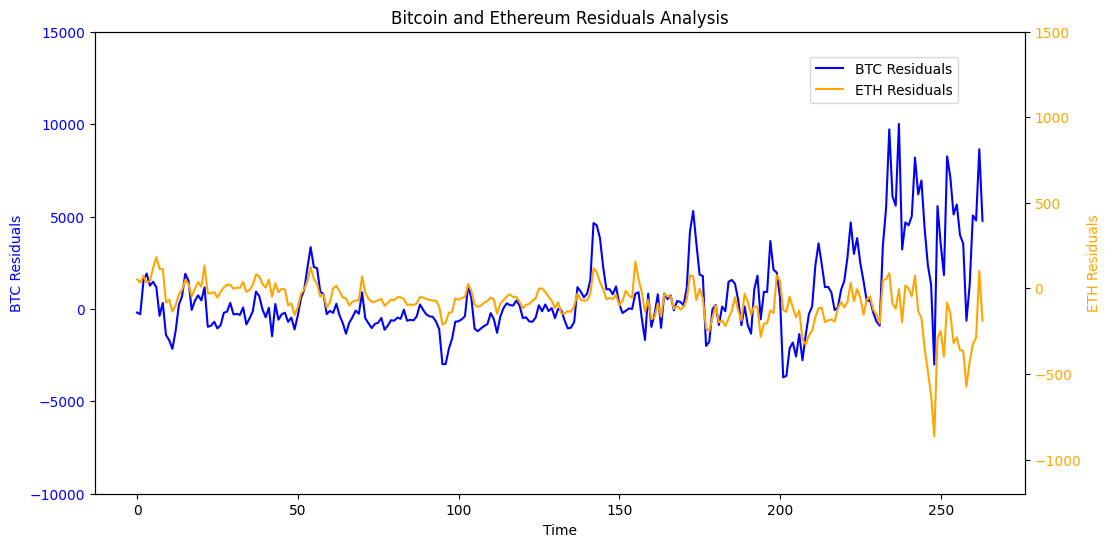

In [40]:
# Calculate residuals
residuals_btc = y_test_inv[:, 0] - predictions_inv[:, 0]
residuals_eth = y_test_inv[:, 1] - predictions_inv[:, 1]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Bitcoin residuals on the primary y-axis
ax1.plot(residuals_btc, label='BTC Residuals', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Residuals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set y-limits for Bitcoin residuals
ax1.set_ylim(-10000, 15000)

# Create a secondary y-axis and plot Ethereum residuals
ax2 = ax1.twinx()
ax2.plot(residuals_eth, label='ETH Residuals', color='orange')
ax2.set_ylabel('ETH Residuals', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set y-limits for Ethereum residuals
ax2.set_ylim(-1200, 1500)

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Add title
plt.title('Bitcoin and Ethereum Residuals Analysis')

# Show plot
plt.show()

# PREDICTIONS LSTM MODEL

Training samples: (1052, 60, 4), Test samples: (264, 60, 4)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            17664     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 50,818
Trainable params: 50,818
Non-trainable params: 0
________________________________________________________

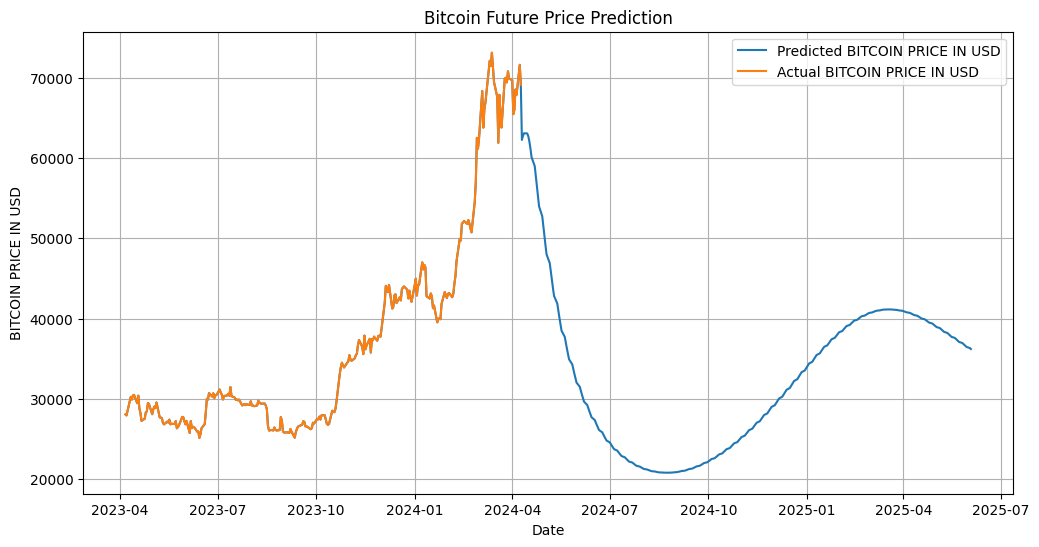

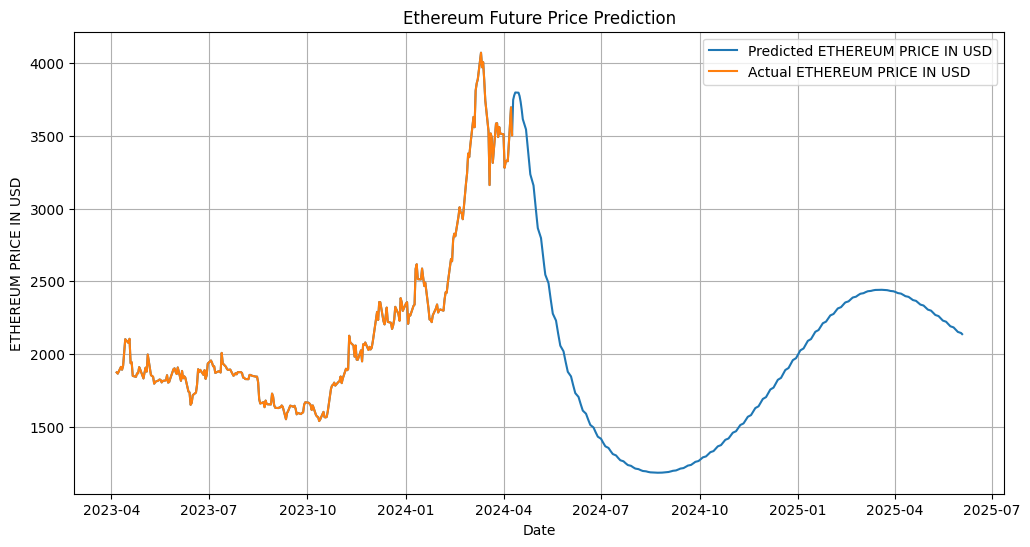

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DataCapstone[features])

# Convert to supervised format
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length][:2])  # Only Bitcoin and Ethereum prices as targets
    return np.array(x), np.array(y)

# Define sequence length
SEQ_LENGTH = 60
x, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(2)  # Predict Bitcoin and Ethereum prices only
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Predict on test data
predictions = model.predict(x_test)

# Inverse transform predictions and actual values to their original scale
y_test_inv = scaler.inverse_transform(np.concatenate([y_test, np.zeros((len(y_test), len(features) - 2))], axis=1))[:, :2]
predictions_inv = scaler.inverse_transform(np.concatenate([predictions, np.zeros((len(predictions), len(features) - 2))], axis=1))[:, :2]

# Function to predict future data
def predict_future(model, last_sequence, n_future, btc_eth_corr=0.92):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_future):
        prediction = model.predict(current_sequence[np.newaxis, :, :])
        full_prediction = np.concatenate([prediction, np.zeros((1, len(features) - 2))], axis=1)
        future_predictions.append(prediction[0])
        current_sequence = np.vstack([current_sequence[1:], full_prediction])
    
    future_predictions = np.array(future_predictions)

    # Adjust Ethereum prices based on the correlation with Bitcoin
    future_predictions[:, 1] = btc_eth_corr * future_predictions[:, 0]
    future_predictions[:, 1] = np.maximum(future_predictions[:, 1], 0)  # Ensure no negative Ethereum prices

    return future_predictions

# Predict the next 300 future values
last_sequence = x_test[-1]
n_future = 300
future_predictions = predict_future(model, last_sequence, n_future)

# Inverse transform predictions to the original scale
future_predictions_inv = scaler.inverse_transform(np.concatenate([future_predictions, np.zeros((len(future_predictions), len(features) - 2))], axis=1))[:, :2]

# Generate date range for future predictions
last_date = DataCapstone.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='B')[1:]  # Use business days

# Combine historical and future data for Bitcoin predictions
bitcoin_full_dates = np.concatenate([DataCapstone.index[-len(y_test_inv):], future_dates])
bitcoin_full_predictions = np.concatenate([y_test_inv[:, 0], future_predictions_inv[:, 0]])

# Combine historical and future data for Ethereum predictions
ethereum_full_dates = np.concatenate([DataCapstone.index[-len(y_test_inv):], future_dates])
ethereum_full_predictions = np.concatenate([y_test_inv[:, 1], future_predictions_inv[:, 1]])

# Plot future predictions vs historical data
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_full_dates, bitcoin_full_predictions, label='Predicted BITCOIN PRICE IN USD')
plt.plot(DataCapstone.index[-len(y_test_inv):], y_test_inv[:, 0], label='Actual BITCOIN PRICE IN USD')
plt.legend()
plt.xlabel('Date')
plt.ylabel('BITCOIN PRICE IN USD')
plt.title('Bitcoin Future Price Prediction')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ethereum_full_dates, ethereum_full_predictions, label='Predicted ETHEREUM PRICE IN USD')
plt.plot(DataCapstone.index[-len(y_test_inv):], y_test_inv[:, 1], label='Actual ETHEREUM PRICE IN USD')
plt.legend()
plt.xlabel('Date')
plt.ylabel('ETHEREUM PRICE IN USD')
plt.title('Ethereum Future Price Prediction')
plt.grid()
plt.show()

# LSTM MODEL WITH CORRELATION WITH S&P500 AND GOLD

Training samples: (1005, 60, 10), Test samples: (252, 60, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            12200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 32,502
Trainable params: 32,502
Non-trainable params: 0
________________________________________________________

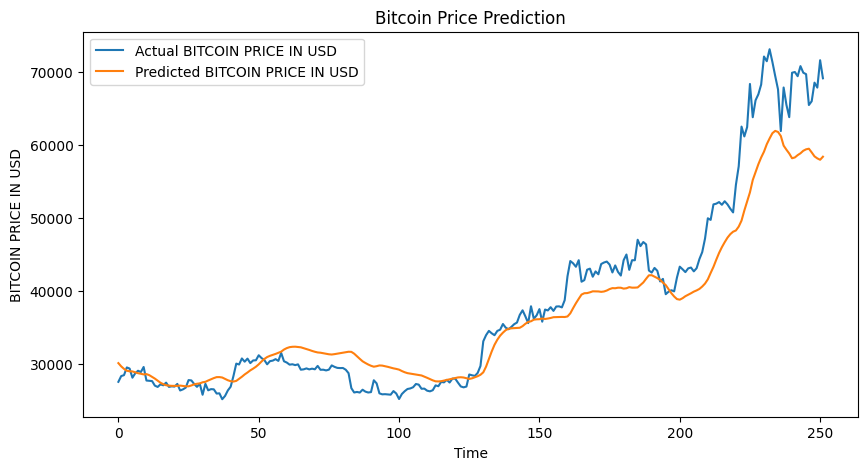

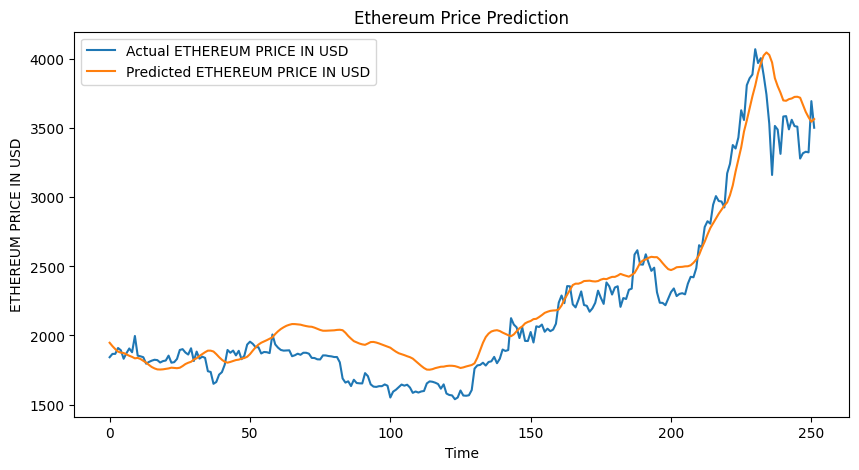

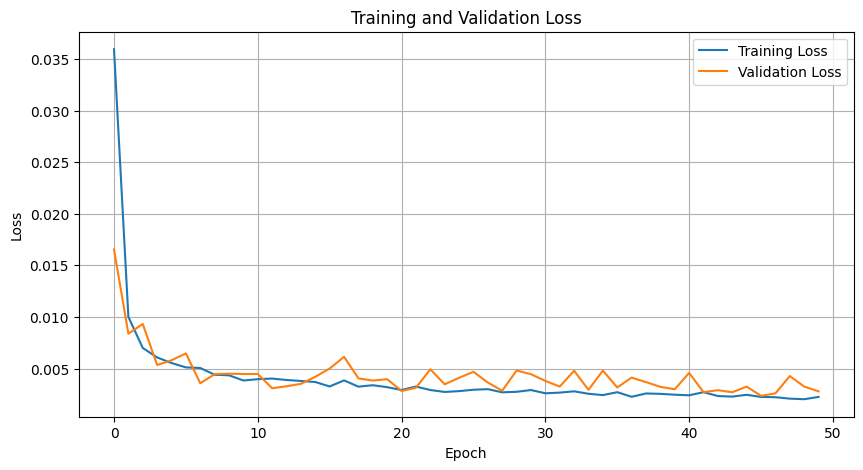

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file into a DataFrame
DataCapstone = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=',')

# Select relevant features using the given column names
btc_col = 'BITCOIN PRICE IN USD'
eth_col = 'ETHEREUM PRICE IN USD'
sp500_col = 'S&P 500 PRICE IN USD'
gold_col = 'GOLD PRICE IN USD'
features = [btc_col, eth_col, sp500_col, gold_col]

# Calculate correlations and add as features
DataCapstone['BTC_ETH_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[eth_col])
DataCapstone['BTC_SP500_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[sp500_col])
DataCapstone['BTC_GOLD_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[gold_col])
DataCapstone['ETH_BTC_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[btc_col])
DataCapstone['ETH_SP500_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[sp500_col])
DataCapstone['ETH_GOLD_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[gold_col])

# Drop initial NaN values from correlation calculations
DataCapstone = DataCapstone.dropna()

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DataCapstone[features + ['BTC_ETH_CORR', 'BTC_SP500_CORR', 'BTC_GOLD_CORR', 'ETH_BTC_CORR', 'ETH_SP500_CORR', 'ETH_GOLD_CORR']])

# Convert to supervised format
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length][:2])  # Only Bitcoin and Ethereum prices as targets
    return np.array(x), np.array(y)

# Define sequence length
SEQ_LENGTH = 60
x, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, x_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(2)  # Predict Bitcoin and Ethereum prices only
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Predict on test data
predictions = model.predict(x_test)

# Inverse transform predictions and actual values to their original scale
y_test_inv = scaler.inverse_transform(np.concatenate([y_test, np.zeros((len(y_test), x_test.shape[2] - 2))], axis=1))[:, :2]
predictions_inv = scaler.inverse_transform(np.concatenate([predictions, np.zeros((len(predictions), x_test.shape[2] - 2))], axis=1))[:, :2]

# Compare predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 0], label='Actual BITCOIN PRICE IN USD')
plt.plot(predictions_inv[:, 0], label='Predicted BITCOIN PRICE IN USD')
plt.legend()
plt.xlabel('Time')
plt.ylabel('BITCOIN PRICE IN USD')
plt.title('Bitcoin Price Prediction')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 1], label='Actual ETHEREUM PRICE IN USD')
plt.plot(predictions_inv[:, 1], label='Predicted ETHEREUM PRICE IN USD')
plt.legend()
plt.xlabel('Time')
plt.ylabel('ETHEREUM PRICE IN USD')
plt.title('Ethereum Price Prediction')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Calculate evaluation metrics for Bitcoin
btc_actual = y_test_inv[:, 0]
btc_predictions = predictions_inv[:, 0]
btc_mae = mean_absolute_error(btc_actual, btc_predictions)
btc_mape = np.mean(np.abs((btc_actual - btc_predictions) / btc_actual)) * 100
btc_r2 = r2_score(btc_actual, btc_predictions)

# Calculate evaluation metrics for Ethereum
eth_actual = y_test_inv[:, 1]
eth_predictions = predictions_inv[:, 1]
eth_mae = mean_absolute_error(eth_actual, eth_predictions)
eth_mape = np.mean(np.abs((eth_actual - eth_predictions) / eth_actual)) * 100
eth_r2 = r2_score(eth_actual, eth_predictions)

# Print evaluation metrics
print("\nBitcoin Prediction Metrics:")
print(f"Mean Absolute Error: {btc_mae}")
print(f"Mean Absolute Percentage Error: {btc_mape}%")
print(f"R-squared Score: {btc_r2}")

print("\nEthereum Prediction Metrics:")
print(f"Mean Absolute Error: {eth_mae}")
print(f"Mean Absolute Percentage Error: {eth_mape}%")
print(f"R-squared Score: {eth_r2}")


Bitcoin Prediction Metrics:
Mean Absolute Error: 3111.369628773971
Mean Absolute Percentage Error: 6.991318338500592%
R-squared Score: 0.884409707322686

Ethereum Prediction Metrics:
Mean Absolute Error: 143.032266023599
Mean Absolute Percentage Error: 6.550255220961676%
R-squared Score: 0.9114275560790139


# PREDICTIONS LSTM MODEL (2)

Training samples: (1005, 60, 10), Test samples: (252, 60, 10)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 64)            19200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 52,354
Trainable params: 52,354
Non-trainable params: 0
______________________________________________________

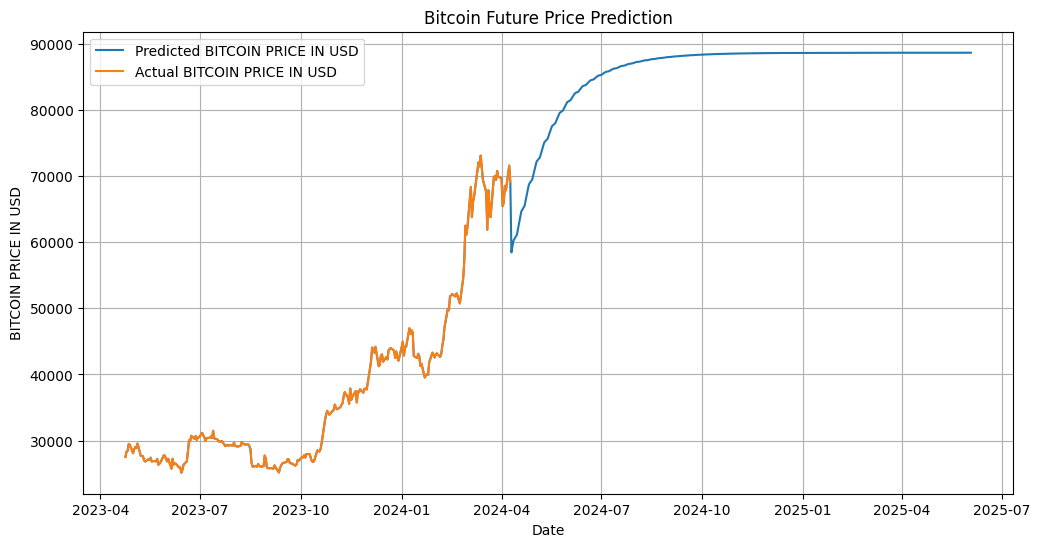

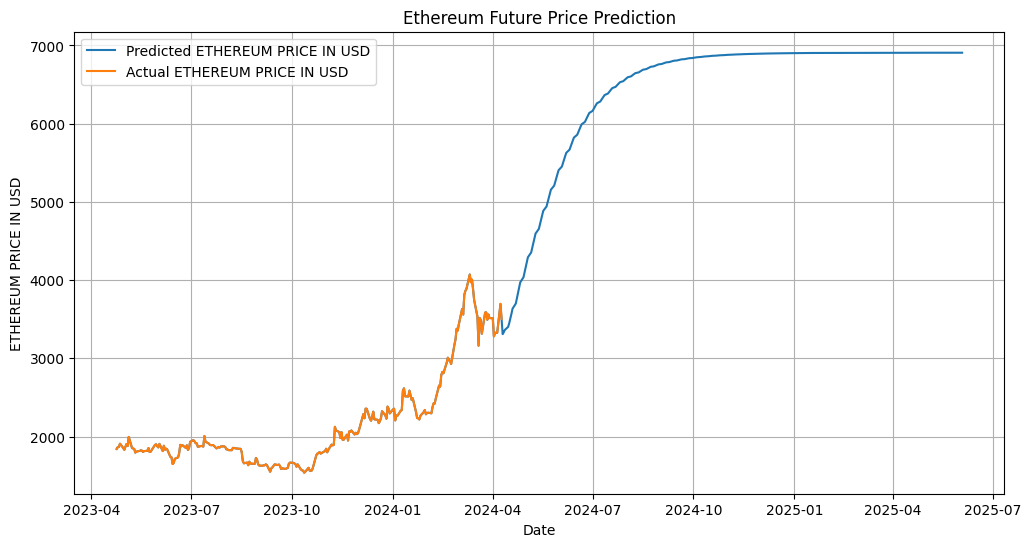

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
DataCapstone = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=',')

# Convert the 'Date' column to datetime
DataCapstone['Date'] = pd.to_datetime(DataCapstone['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
DataCapstone.set_index('Date', inplace=True)

# Select relevant features using the given column names
btc_col = 'BITCOIN PRICE IN USD'
eth_col = 'ETHEREUM PRICE IN USD'
sp500_col = 'S&P 500 PRICE IN USD'
gold_col = 'GOLD PRICE IN USD'
features = [btc_col, eth_col, sp500_col, gold_col]

# Calculate correlations and add as features
DataCapstone['BTC_ETH_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[eth_col])
DataCapstone['BTC_SP500_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[sp500_col])
DataCapstone['BTC_GOLD_CORR'] = DataCapstone[btc_col].rolling(window=60).corr(DataCapstone[gold_col])
DataCapstone['ETH_BTC_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[btc_col])
DataCapstone['ETH_SP500_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[sp500_col])
DataCapstone['ETH_GOLD_CORR'] = DataCapstone[eth_col].rolling(window=60).corr(DataCapstone[gold_col])

# Drop initial NaN values from correlation calculations
DataCapstone = DataCapstone.dropna()

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DataCapstone[features + ['BTC_ETH_CORR', 'BTC_SP500_CORR', 'BTC_GOLD_CORR', 'ETH_BTC_CORR', 'ETH_SP500_CORR', 'ETH_GOLD_CORR']])

# Convert to supervised format
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length][:2])  # Only Bitcoin and Ethereum prices as targets
    return np.array(x), np.array(y)

# Define sequence length
SEQ_LENGTH = 60
x, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, x_train.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(2)  # Predict Bitcoin and Ethereum prices only
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Predict on test data
predictions = model.predict(x_test)

# Inverse transform predictions and actual values to their original scale
y_test_inv = scaler.inverse_transform(np.concatenate([y_test, np.zeros((len(y_test), len(features) + 6 - 2))], axis=1))[:, :2]
predictions_inv = scaler.inverse_transform(np.concatenate([predictions, np.zeros((len(predictions), len(features) + 6 - 2))], axis=1))[:, :2]

# Function to predict future data
def predict_future(model, last_sequence, n_future, scaler, features_len):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_future):
        prediction = model.predict(current_sequence[np.newaxis, :, :])
        full_prediction = np.concatenate([prediction, np.zeros((1, features_len - 2))], axis=1)
        future_predictions.append(prediction[0])
        current_sequence = np.vstack([current_sequence[1:], full_prediction])
    
    future_predictions = np.array(future_predictions)
    return future_predictions

# Predict the next 300 future values
last_sequence = x_test[-1]
n_future = 300
future_predictions = predict_future(model, last_sequence, n_future, scaler, len(features) + 6)

# Inverse transform predictions to the original scale
future_predictions_inv = scaler.inverse_transform(np.concatenate([future_predictions, np.zeros((len(future_predictions), len(features) + 6 - 2))], axis=1))[:, :2]

# Generate date range for future predictions
last_date = DataCapstone.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='B')[1:]  # Use business days

# Combine historical and future data for Bitcoin predictions
bitcoin_full_dates = np.concatenate([DataCapstone.index[-len(y_test_inv):].to_numpy(), future_dates])
bitcoin_full_predictions = np.concatenate([y_test_inv[:, 0], future_predictions_inv[:, 0]])

# Combine historical and future data for Ethereum predictions
ethereum_full_dates = np.concatenate([DataCapstone.index[-len(y_test_inv):].to_numpy(), future_dates])
ethereum_full_predictions = np.concatenate([y_test_inv[:, 1], future_predictions_inv[:, 1]])

# Convert all dates to datetime format
bitcoin_full_dates = pd.to_datetime(bitcoin_full_dates)
ethereum_full_dates = pd.to_datetime(ethereum_full_dates)

# Plot future predictions vs historical data
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_full_dates, bitcoin_full_predictions, label='Predicted BITCOIN PRICE IN USD')
plt.plot(DataCapstone.index[-len(y_test_inv):], y_test_inv[:, 0], label='Actual BITCOIN PRICE IN USD')
plt.legend()
plt.xlabel('Date')
plt.ylabel('BITCOIN PRICE IN USD')
plt.title('Bitcoin Future Price Prediction')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ethereum_full_dates, ethereum_full_predictions, label='Predicted ETHEREUM PRICE IN USD')
plt.plot(DataCapstone.index[-len(y_test_inv):], y_test_inv[:, 1], label='Actual ETHEREUM PRICE IN USD')
plt.legend()
plt.xlabel('Date')
plt.ylabel('ETHEREUM PRICE IN USD')
plt.title('Ethereum Future Price Prediction')
plt.grid()
plt.show()